In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_25-09-20_J1J2J3pField/'
#foldername = '../../Analysis_PSI_EPFL/Runs_28-09-20_J1J2J3p_LargeField/'
#foldername = '../../Analysis_PSI_EPFL/Runs_28-09-20_J1J2J3p_VerySmallField/'
#foldername = '../../Analysis_PSI_EPFL/Runs_28-09-20_J1J2J3p_SmallField/'
foldername = '../../Analysis_PSI_EPFL/Runs_05-10-20_J1check/'
results_foldername = 'Results_29-09-20'


filenamelist = [#'KJ1Field_L4_MEASFIELD_nsm4096_ncores9_J20_J30_J3st0_folder/backup'
                #'KJ1Field_L4_MEASFIELD_J1noh_nsm4096_ncores9_J20_J30_J3st0_folder/backup'
                #'KJ1J2J3pField_MEASFIELD_L4_nsm4096_ncores9_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_MEASFIELD_L4_nsm4096_ncores9_J20.0233_J30_J3st0_folder/backup'
                #'KJ1J2J3pField_SMALLFIELD_L4_nsm8192_ncores6_J20.0233_J30_J3st0_folder/backup'
                #'KJ1J2J3pField_SMALLFIELD_L4_nsm8192_ncores9_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_LARGEFIELD_L4_nsm8192_ncores6_J20.0233_J30_J3st0_folder/backup'
                #'KJ1J2J3pField_MEDIUM_LARGEFIELD_L4_nsm8192_ncores9_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_SHORT_LARGEFIELD_L4_nsm512_ncores9_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_VERYSMALLFIELD_L4_nsm1024_ncores4_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_MED_VERYSMALLFIELD_L4_nsm8192_ncores4_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_SMALLFIELD_L4_nsm1024_ncores4_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_MEDFIELD_L4_nsm1024_ncores4_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_MEDFIELD2_L4_nsm1024_ncores4_J20.0233_J30.0102_J3st0_folder/backup'
                #'KJ1J2J3pField_MED_SMALLFIELD_L4_nsm8192_ncores4_J20.0233_J30.0102_J3st0_folder/backup'
                'KJ1_Corr_L4_folder/backup'
]

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [4]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh,
 stat_hfields, hfields_plots, listfunctions, sref, idswalker] = \
af.LoadParameters(foldername, filenamelist)

print(J3)
print(J4)
s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])

kw = {'binning': False, 'plzplot': False, 'plotmin': 0, 'plotmax': 17, 'binning_level':0}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC,\
            t_h_S, t_h_Smin, t_h_Smax, MergedData] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[0.0]
[0.0]
nb  [4096] num_in_bin  [4]
[-0.66666667]
No jackknife analysis -- binning level:  0  -- number of bins:  4096
(64, 1)
(4096, 2, 64, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:696: UserWarning: Negative variances num error: 1.776791E-14
  warnings.warn("Negative variances num error: %E" % err)


In [5]:
J3

[0.0]

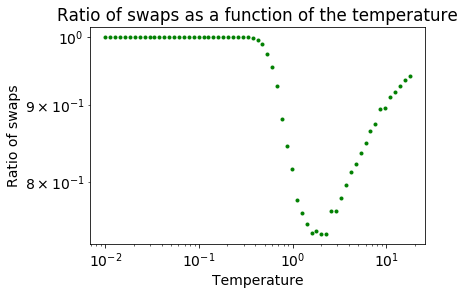

In [6]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

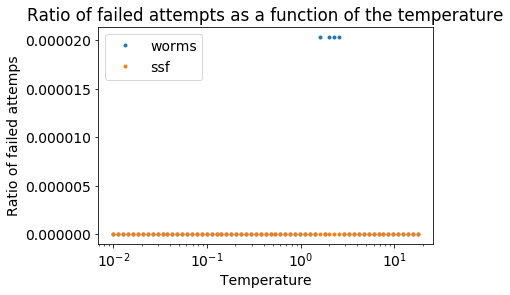

In [7]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

In [8]:
temperatures_plots[0]

[0.01,
 0.011282291113944364,
 0.012729009277978789,
 0.014361238826625544,
 0.016202767719887008,
 0.018280434226738574,
 0.0206245180635377,
 0.02326918168776363,
 0.026252968178461237,
 0.029619362959451737,
 0.03341742755181151,
 0.03770251459186824,
 0.042537074535319276,
 0.047991565804302146,
 0.05414548164181543,
 0.06108850863876919,
 0.06892183381792988,
 0.07775961932407799,
 0.08773066621237416,
 0.0989802915828288,
 0.11167244641805708,
 0.12599210498948735,
 0.14214796065500376,
 0.16037546733632618,
 0.18094027100233076,
 0.20414208116842802,
 0.23031903883486643,
 0.2598526445218819,
 0.29317331822241716,
 0.33076667230263584,
 0.3731805887708976,
 0.42103320405864214,
 0.4750219176826342,
 0.5359335560799595,
 0.6046558397425527,
 0.6821903207721969,
 0.7696669794067008,
 0.868360692245662,
 0.9797098121821803,
 1.105337130822711,
 1.2470735288993828,
 1.4069846593536748,
 1.5874010519682002,
 1.7909520782886759,
 2.02060427183765,
 2.2797045620951937,
 2.5720290523345

In [9]:
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy

In [10]:
hfields_plots

[[0.0]]

In [11]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [12]:
for i in range(0,nh[0]):
    print("h/J1 = ", hfields_plots[0][i], " -> E = ", t_h_MeanE[0][0,i])

h/J1 =  0.0  -> E =  -0.6666666666666514


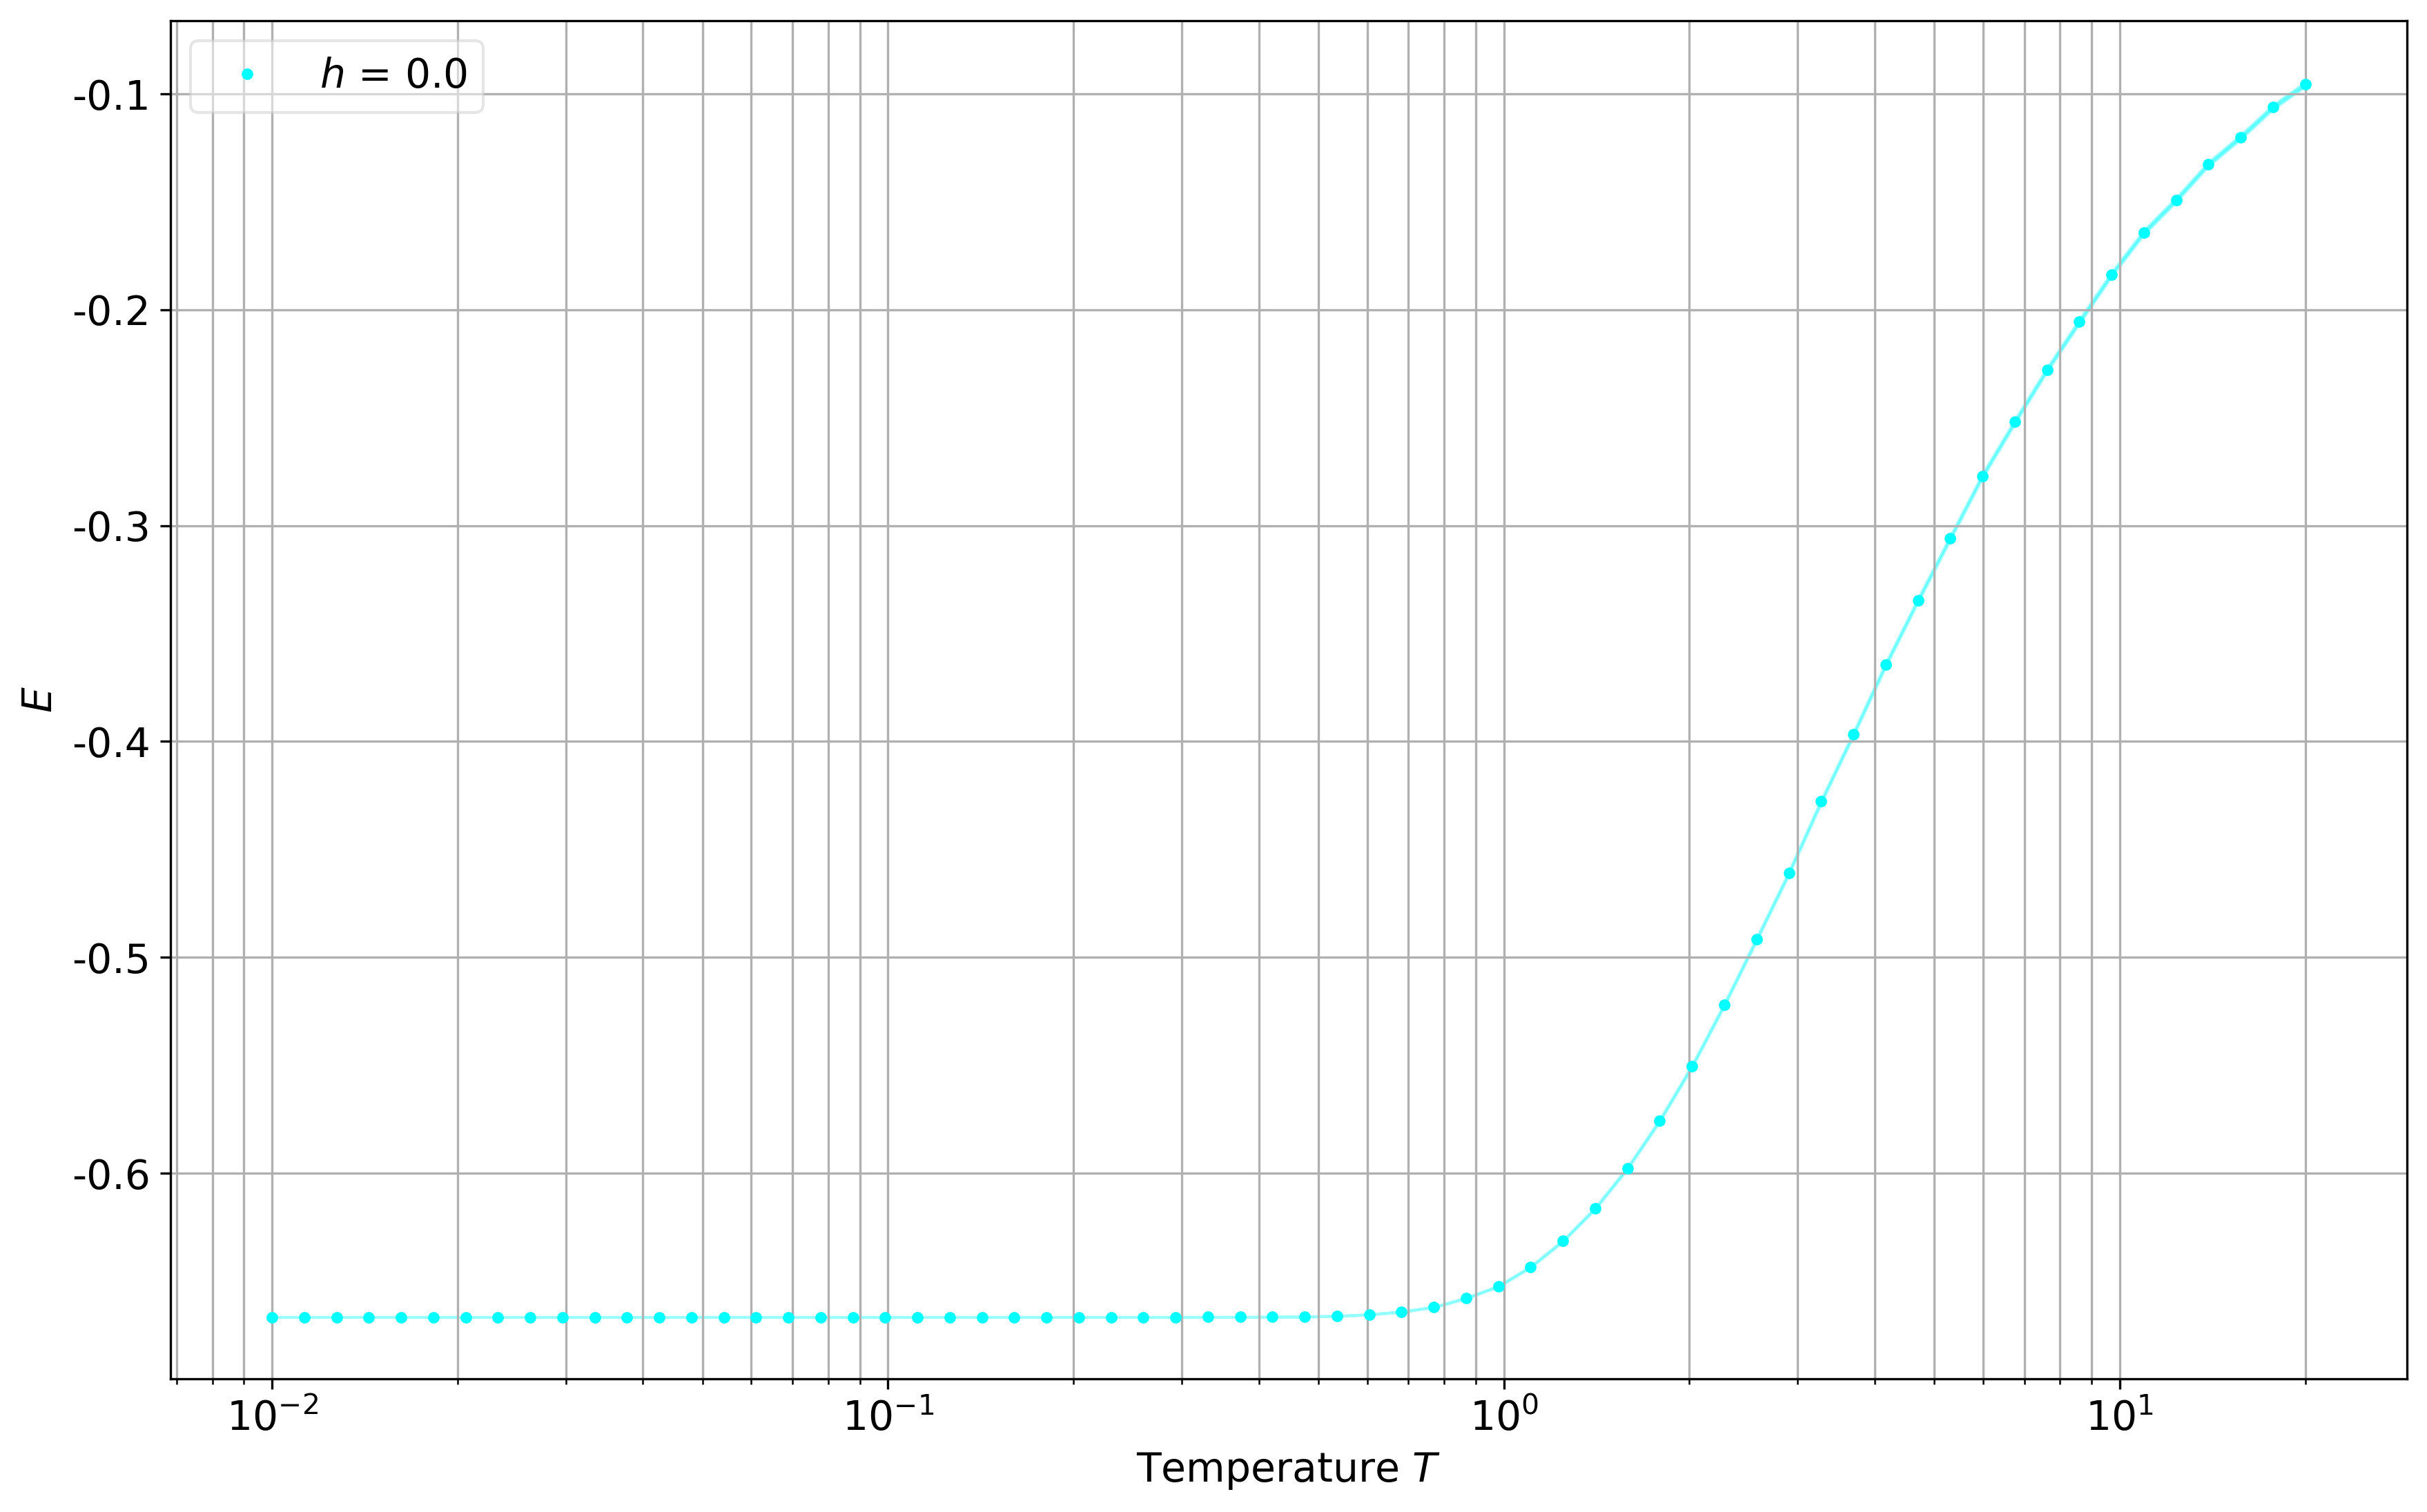

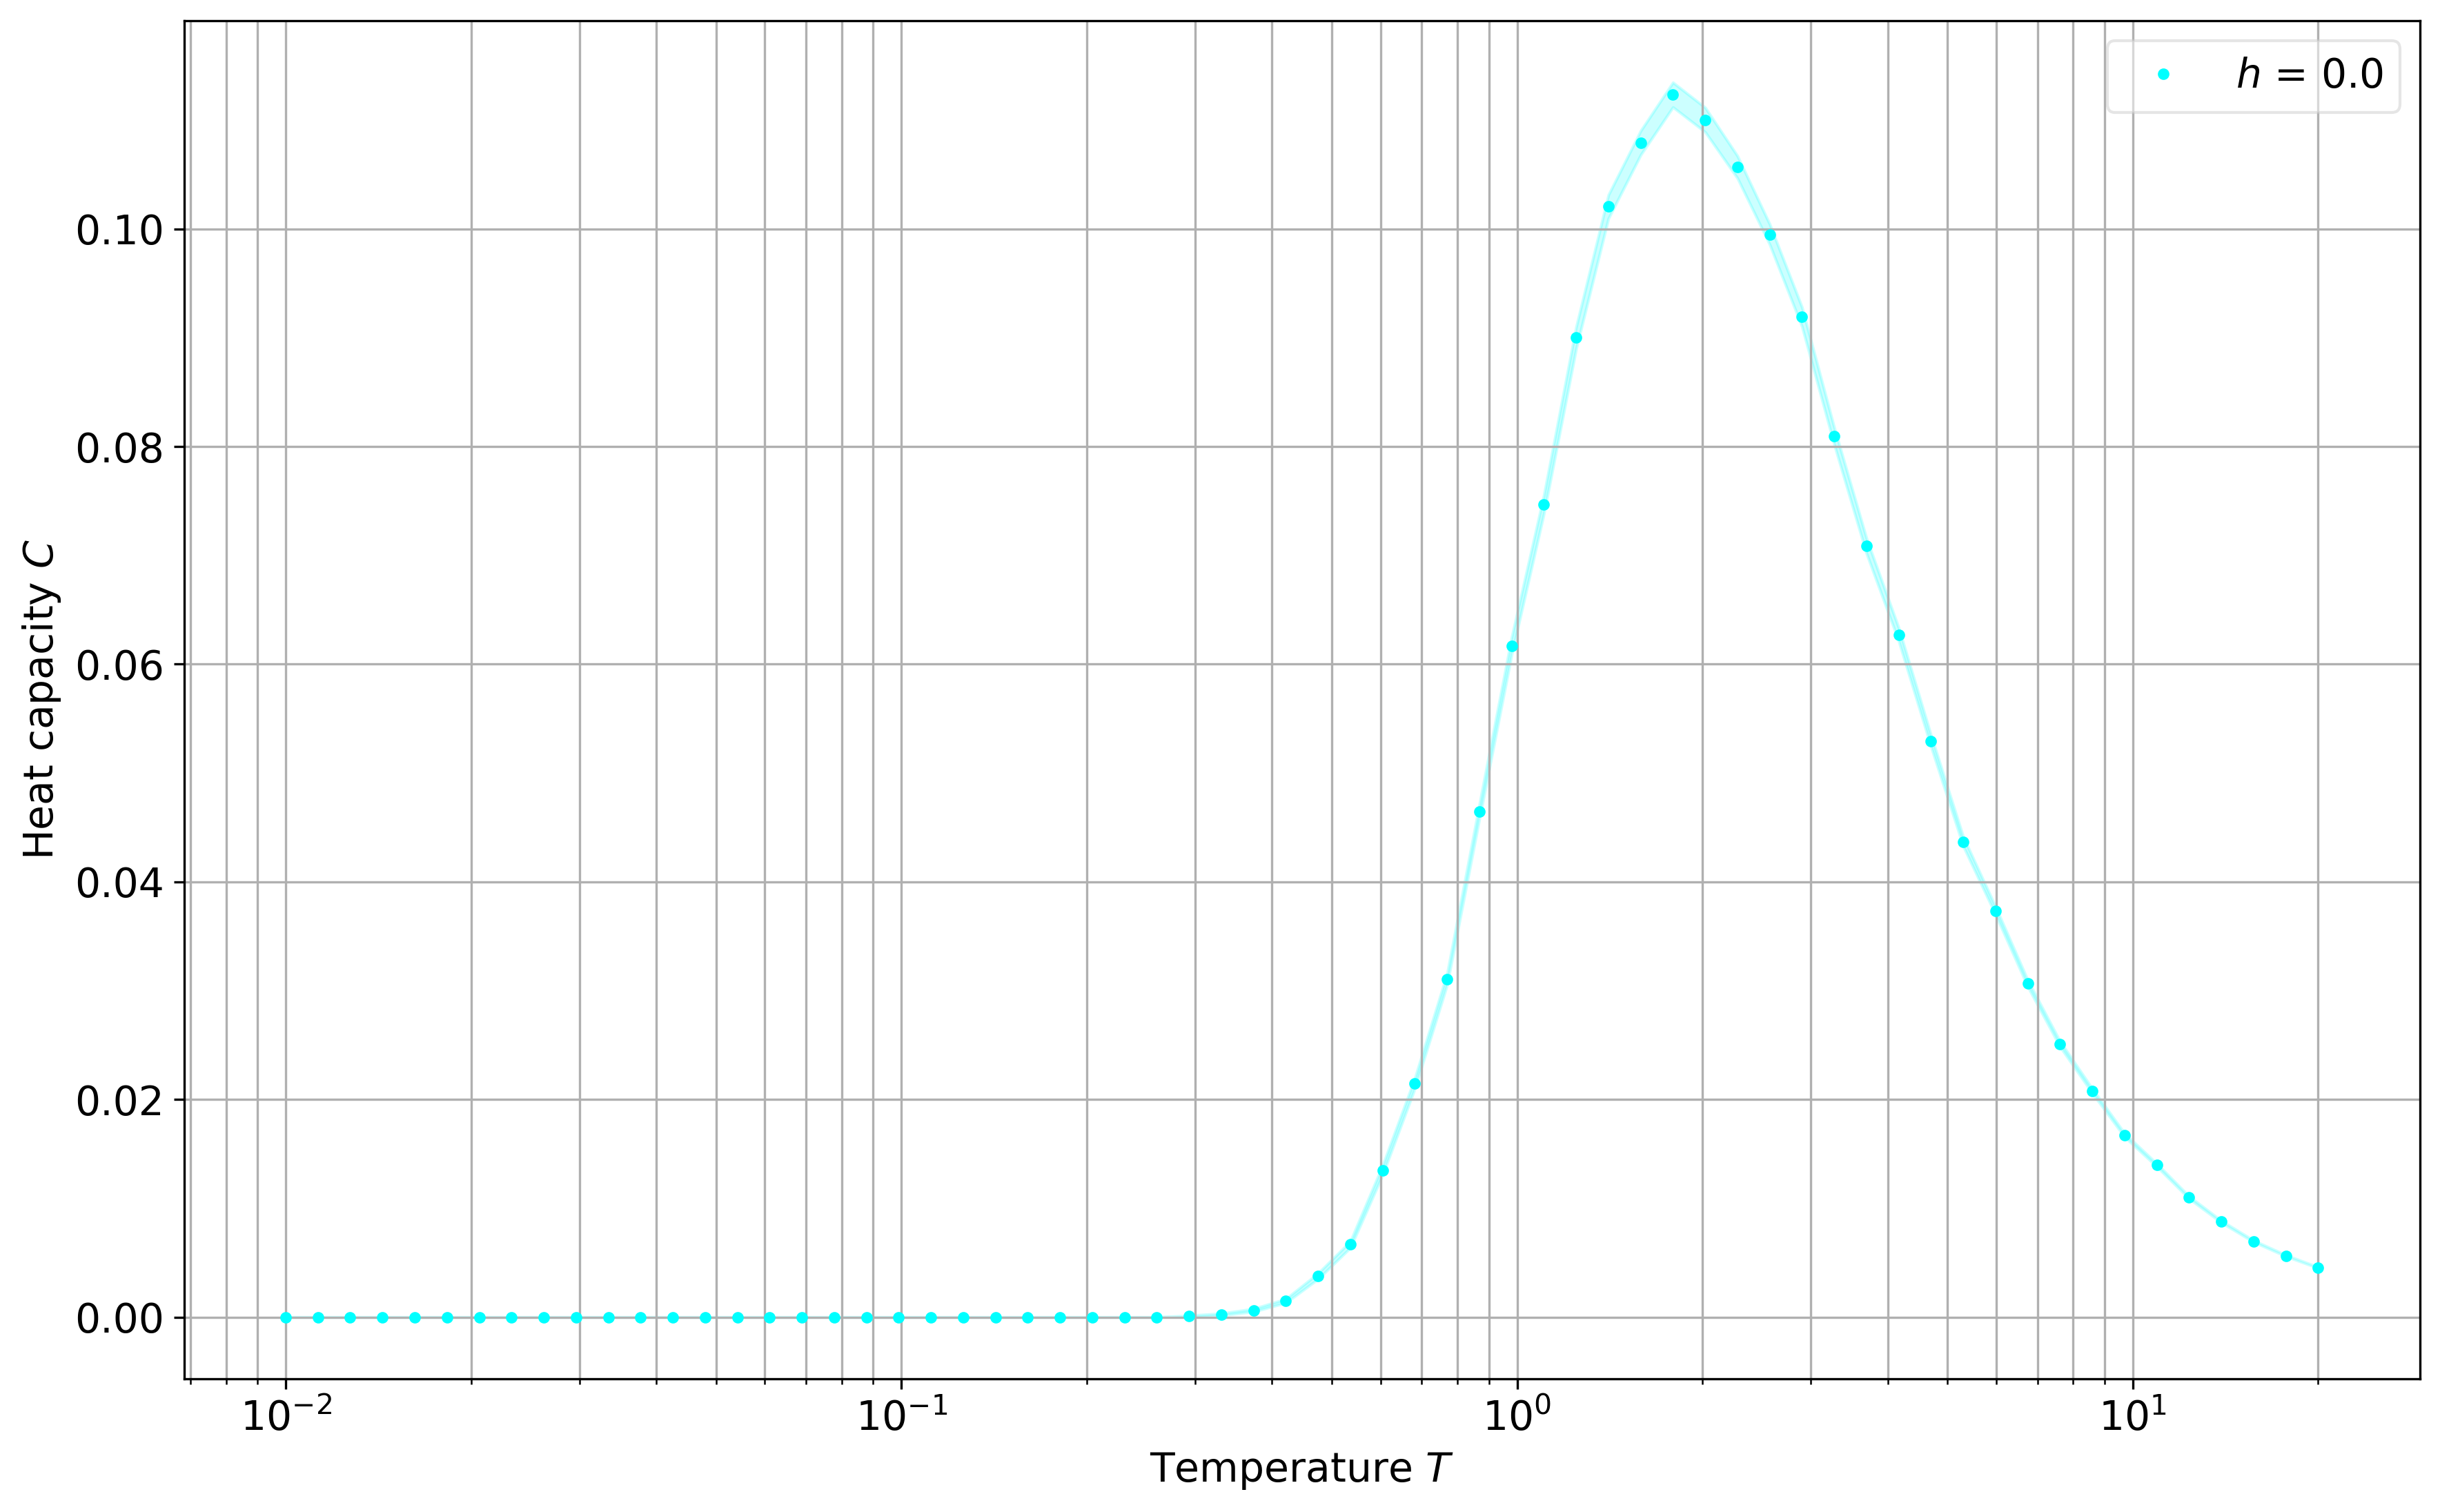

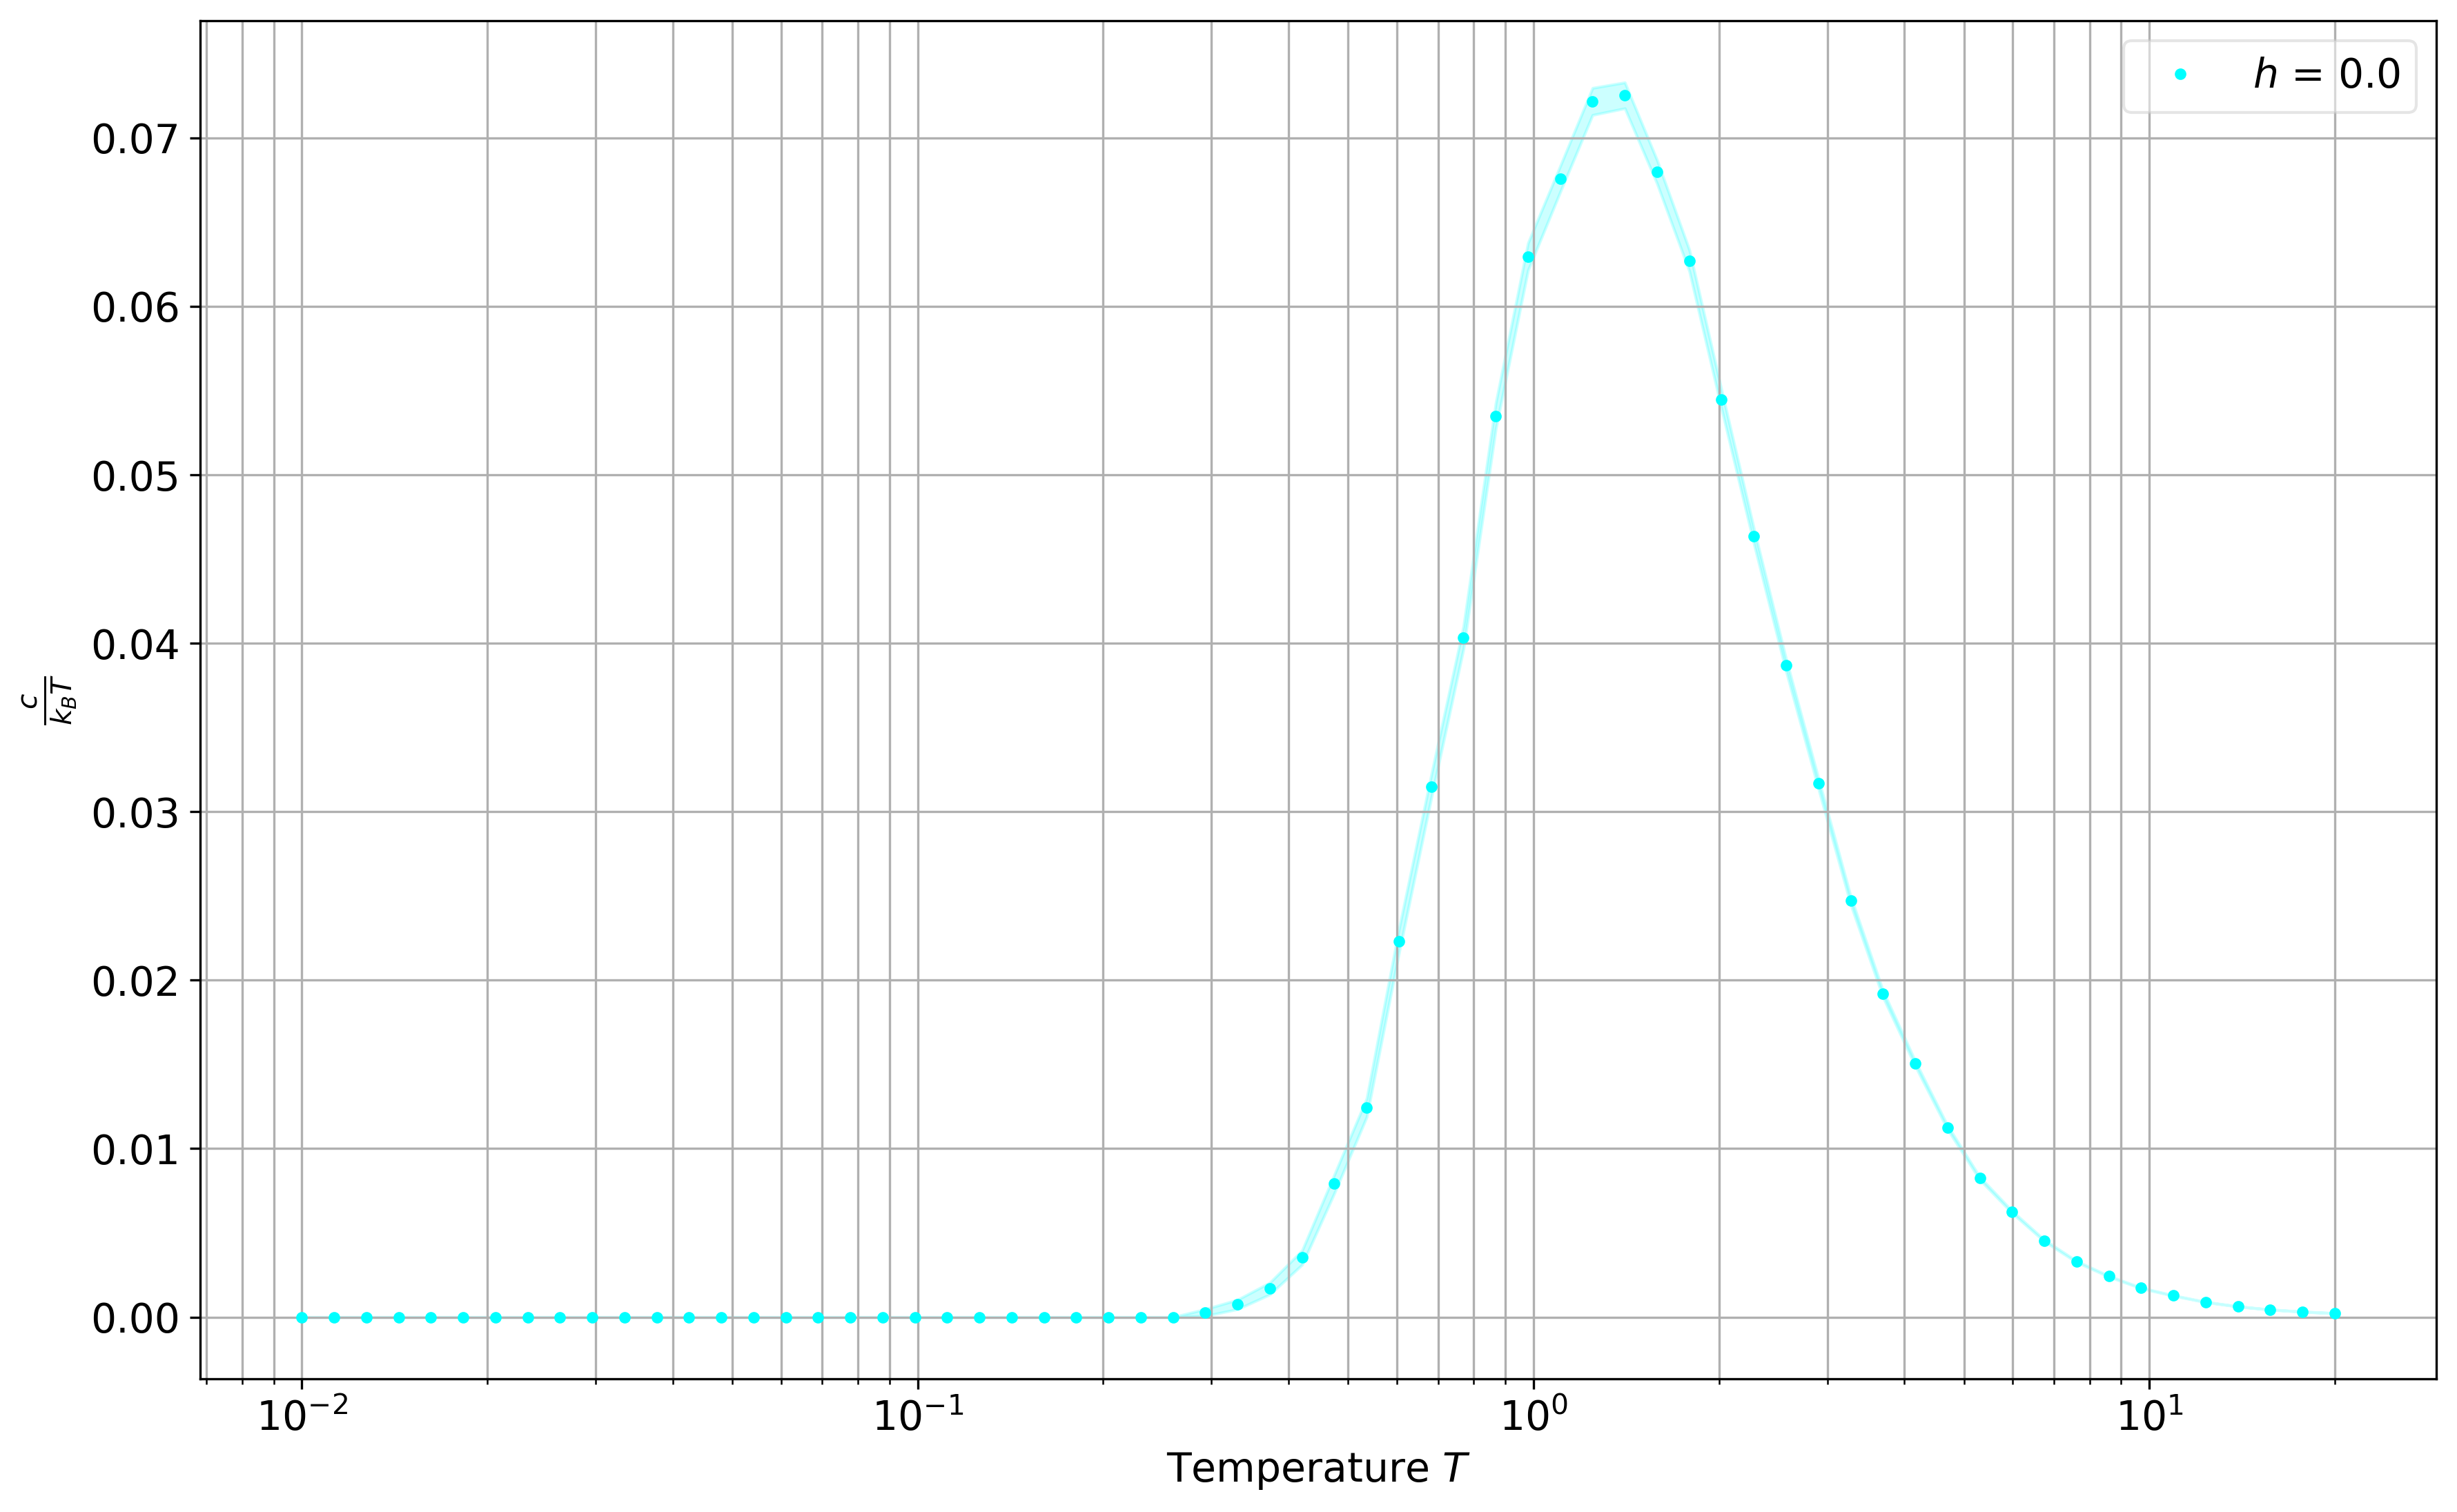

In [13]:
############################################
#        ## Energy ANALYSIS ##
############################################
### Energy
S0 = np.log(2)
kw = {'gscheck': False, 'ploth' : False}
for i in range(n):
    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
plt.show()

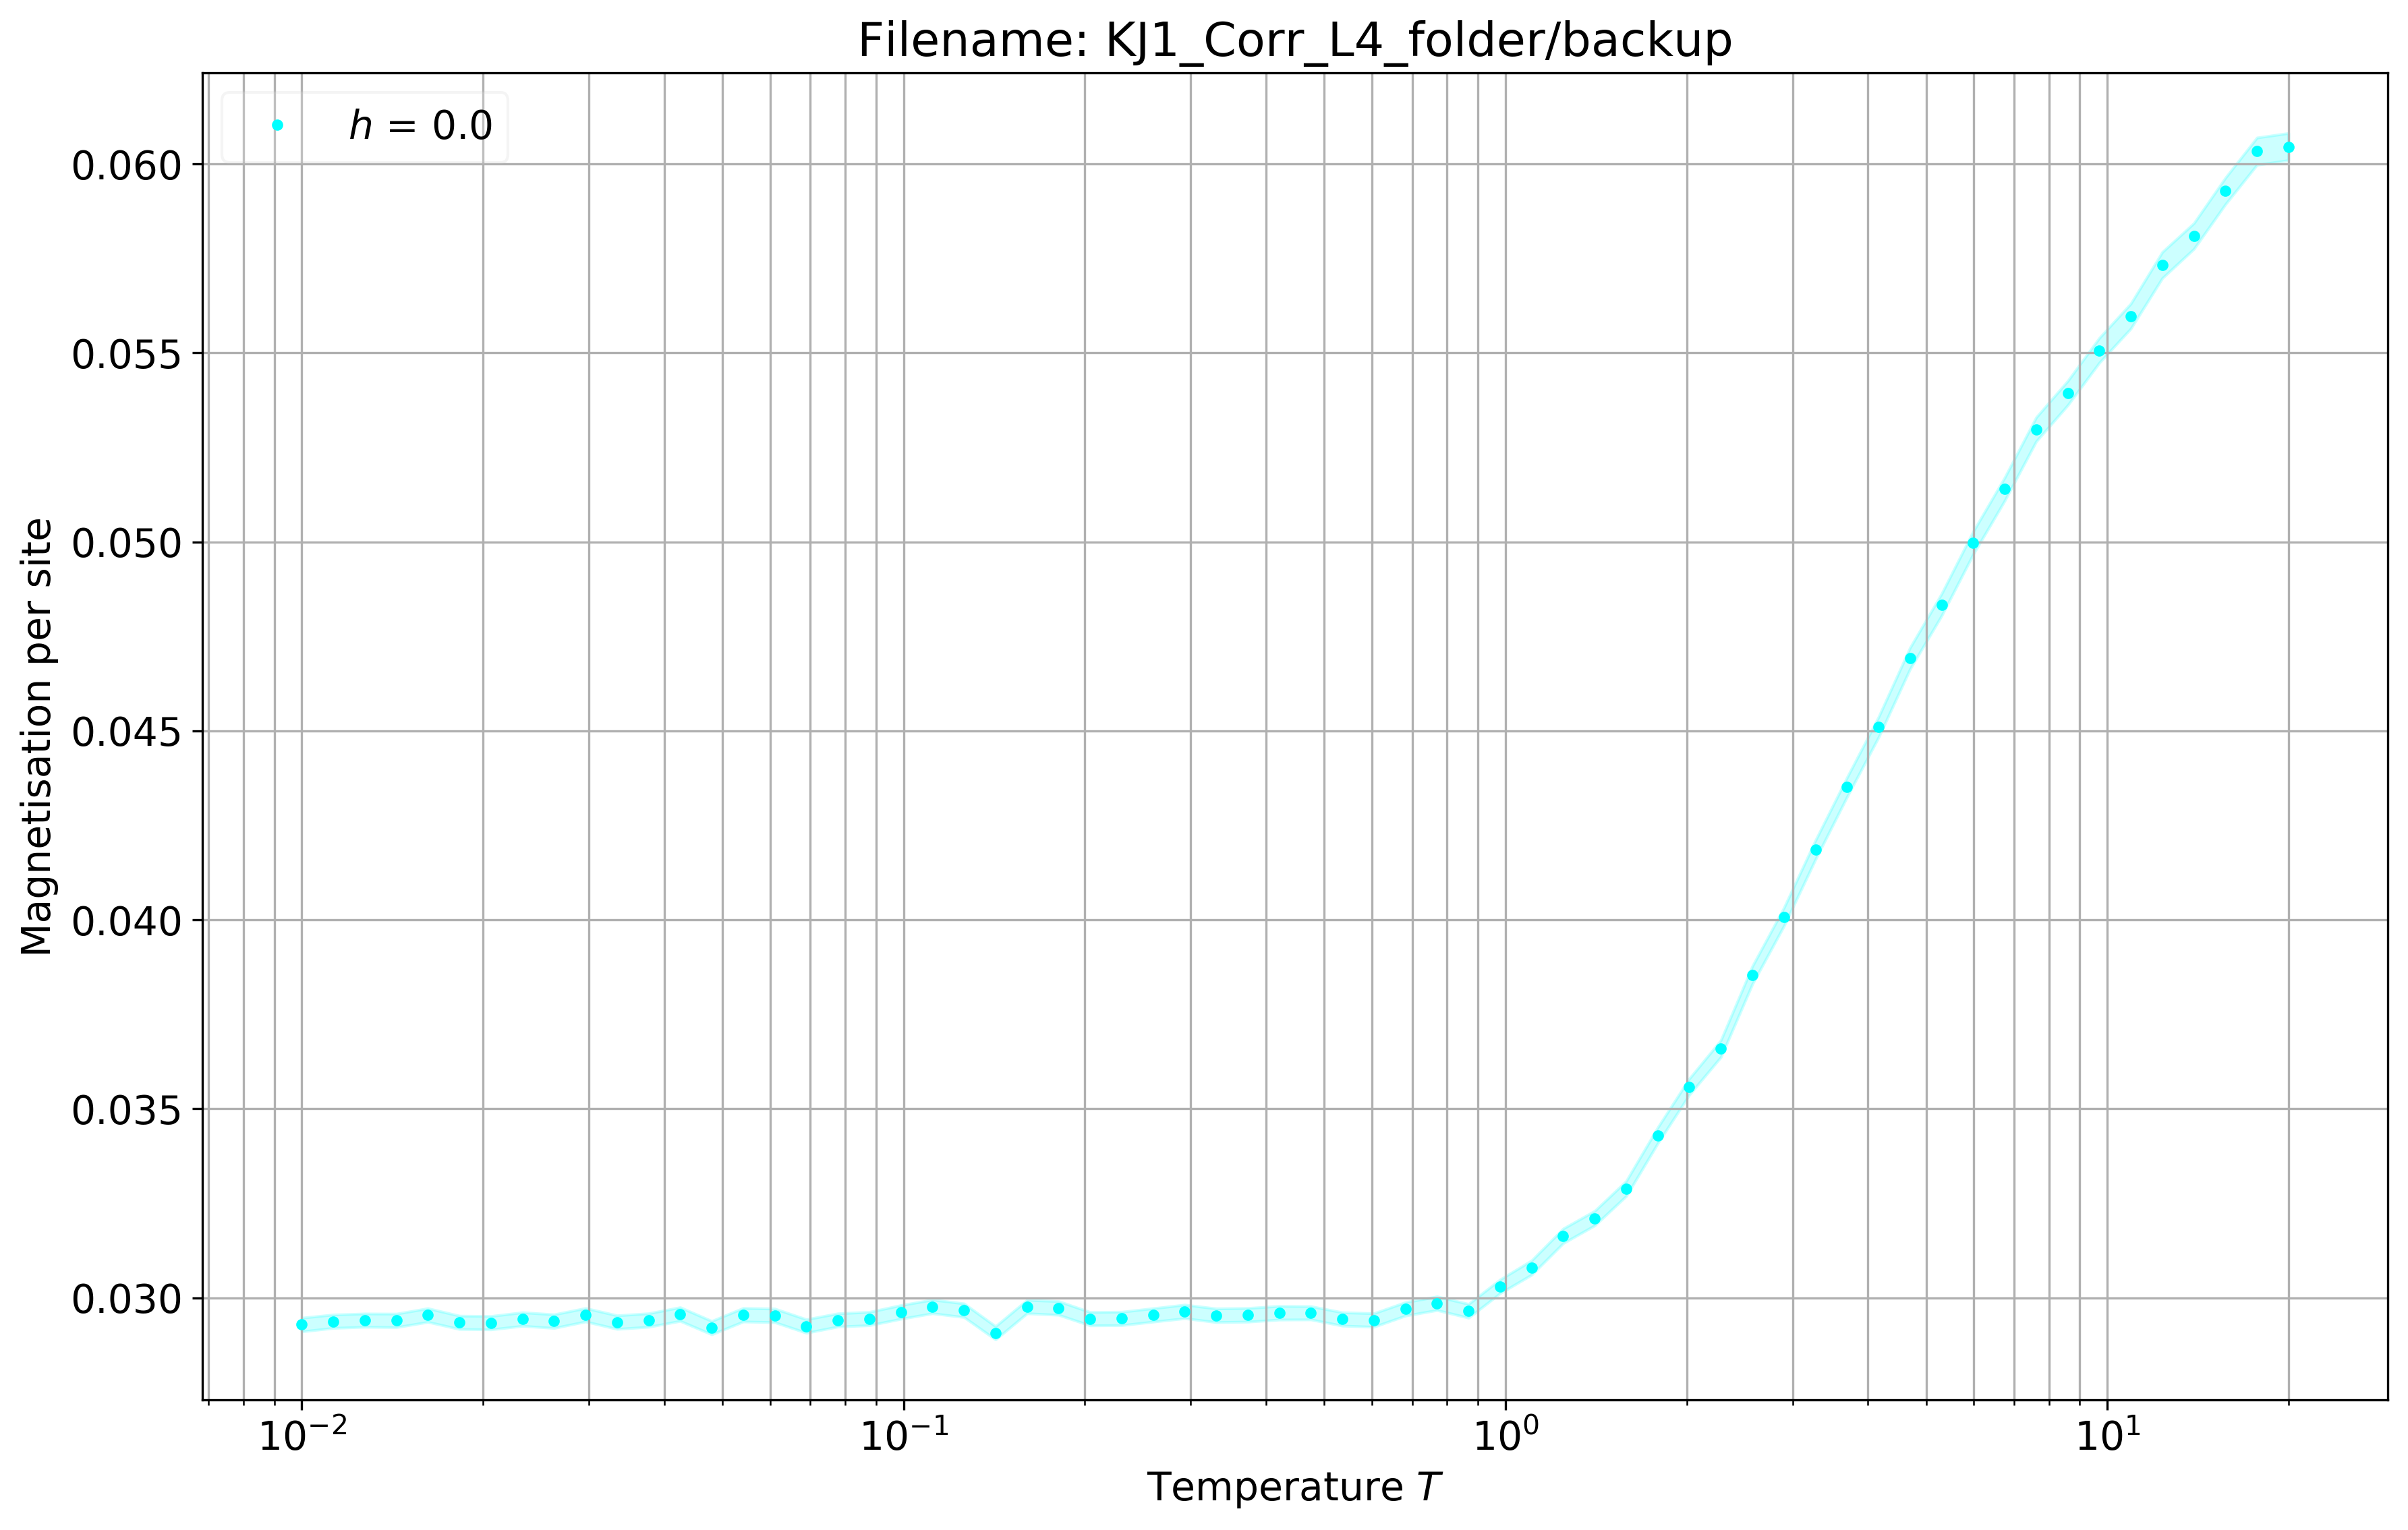

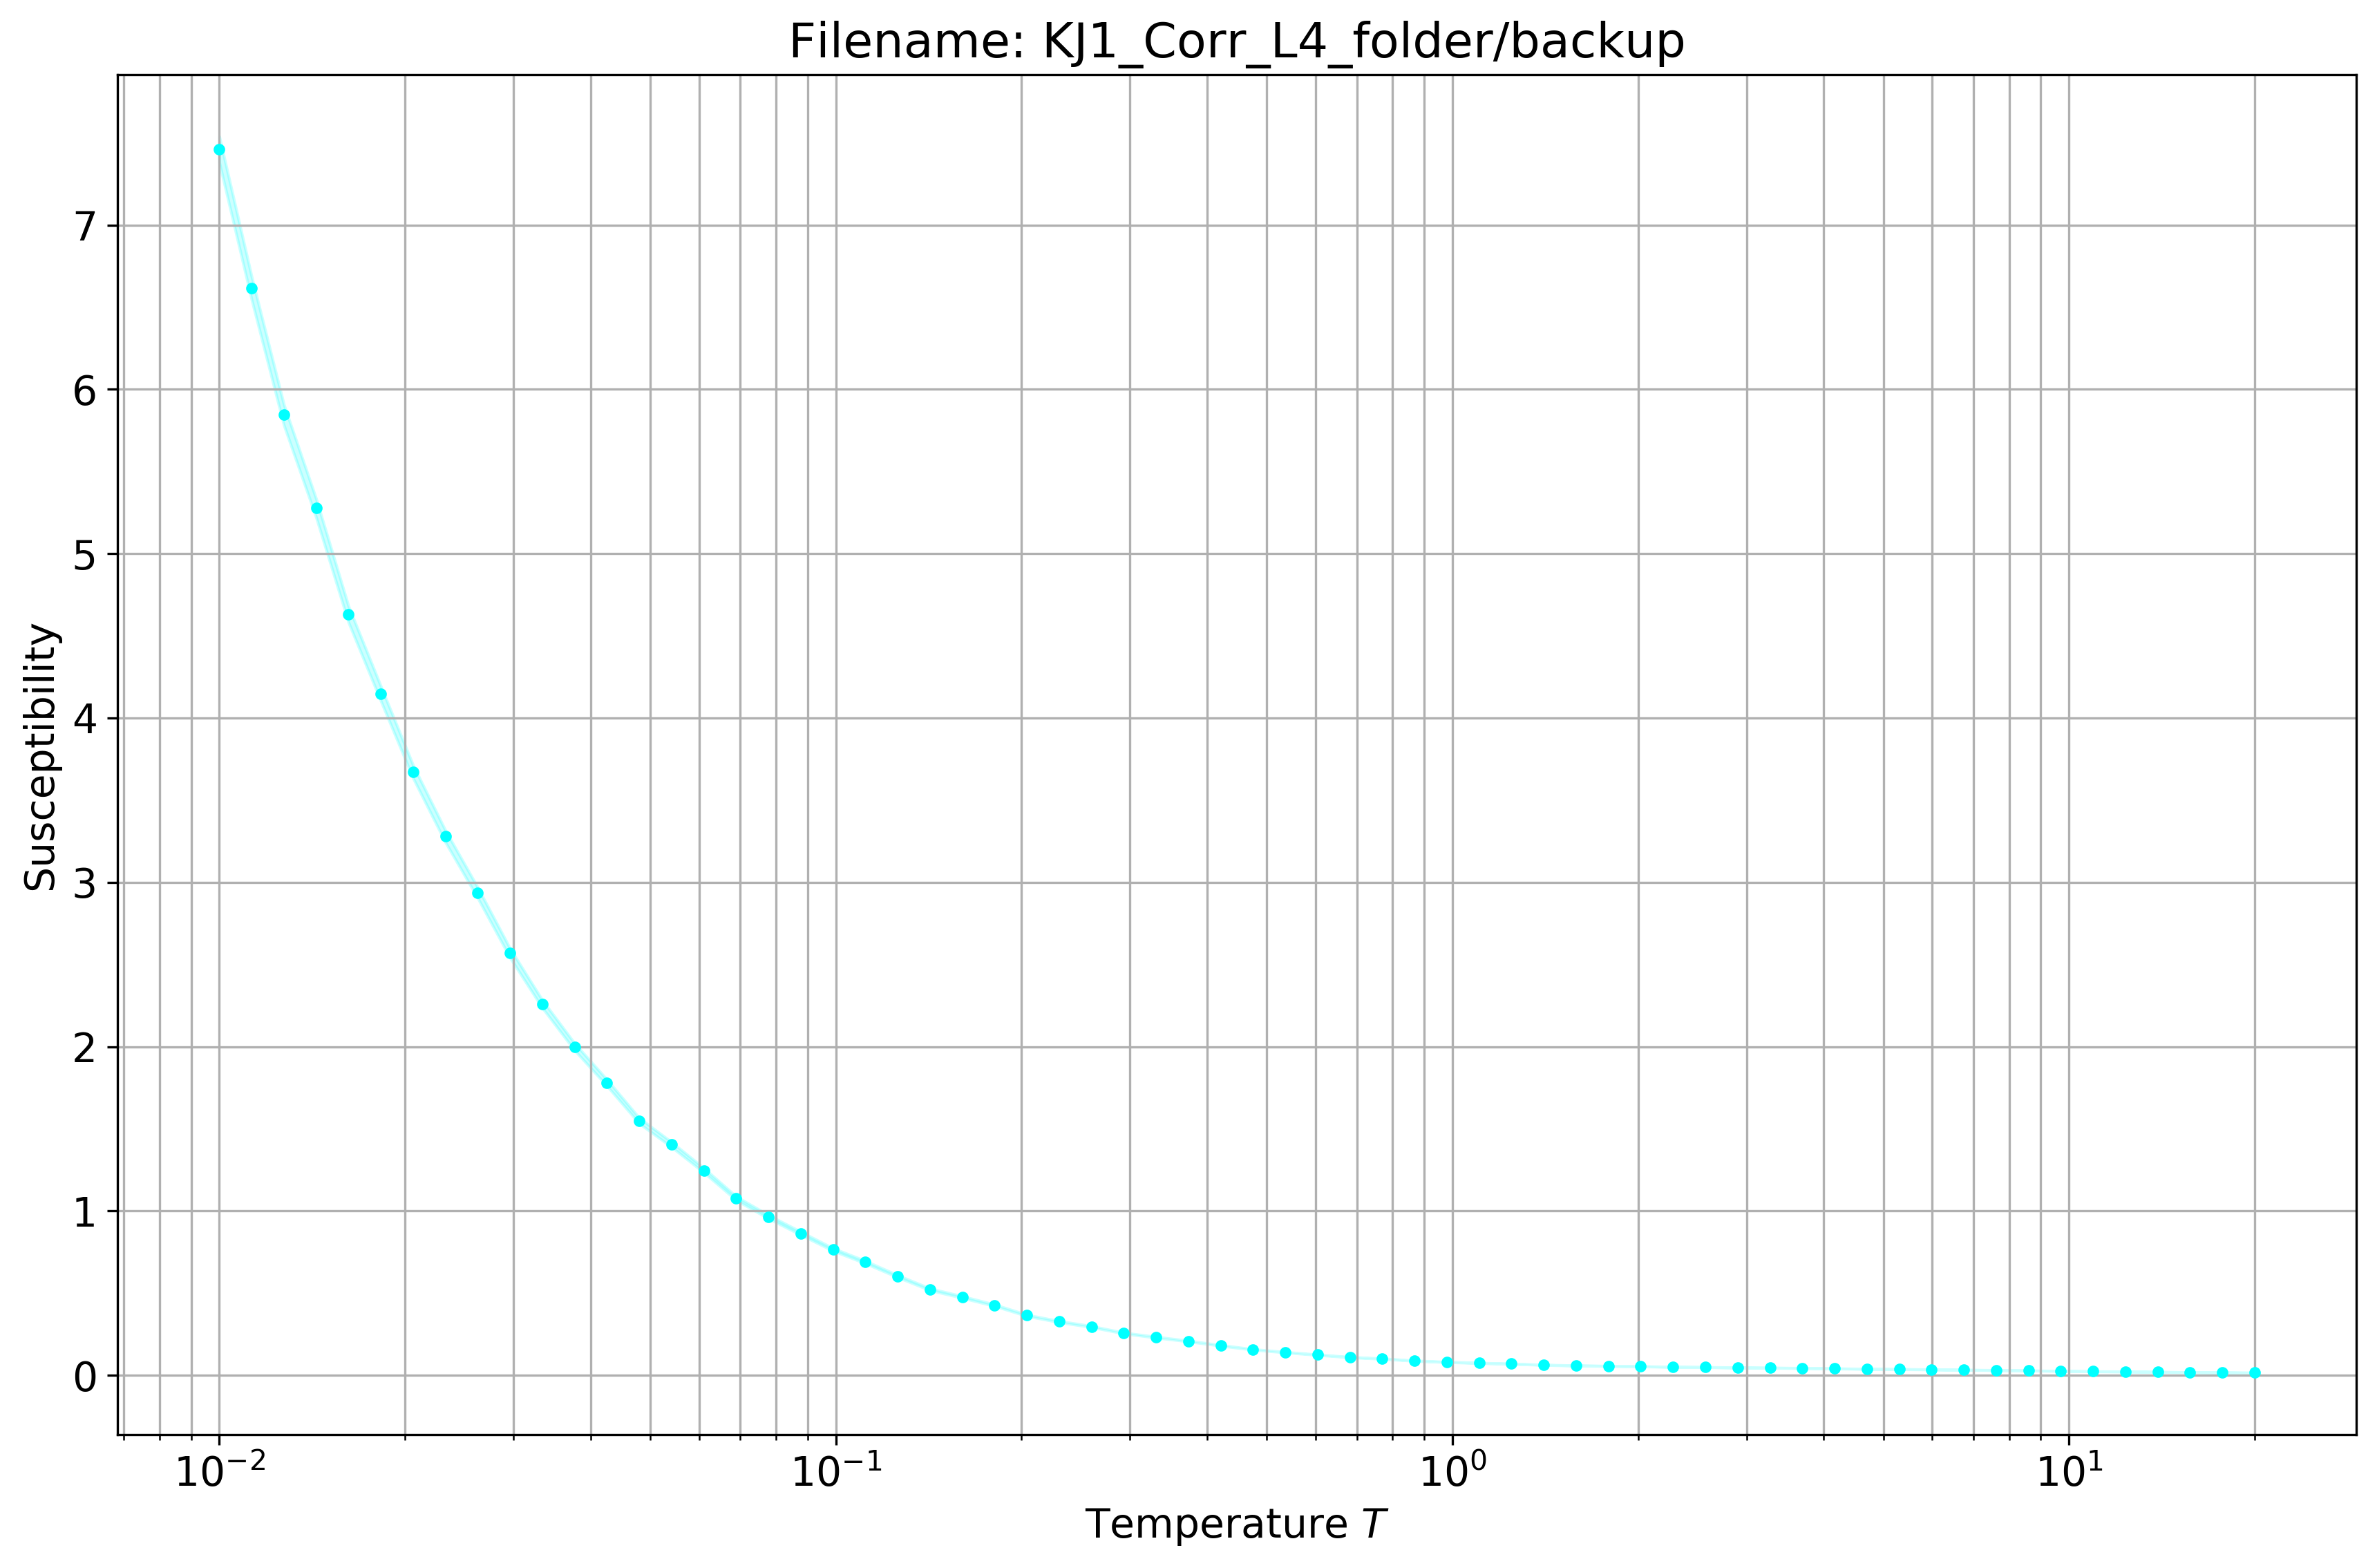

In [14]:
############################################
#        ## MAGNETISATION ANALYSIS ##
############################################
for i in range(n):
    af.BasicPlotsM(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                    results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
                    t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
plt.show()

In [15]:
t_h_MeanM[0][62,:]

array([0.0603341])

In [16]:
rmmag = True
kw = {'rmmag':rmmag,'binning': True, 'plzplot':False}

In [17]:
t_h_MeanFc, t_h_varMeanFc, t_h_MeanSi, t_h_varMeanSi= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps,
                          stat_hfields, nb,t_h_varMeanMsq, **kw)

Binning...Si
 bins list for binning:  [4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
(4096, 64, 1, 144)
(4096, 64, 1, 144)
(2048, 64, 1, 144)
(1024, 64, 1, 144)
(512, 64, 1, 144)
(256, 64, 1, 144)
(128, 64, 1, 144)
(64, 64, 1, 144)
(32, 64, 1, 144)
(16, 64, 1, 144)
Binning...FirstCorrelations
 bins list for binning:  [4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
(4096, 64, 1, 4)
(4096, 64, 1, 4)
(2048, 64, 1, 4)
(1024, 64, 1, 4)
(512, 64, 1, 4)
(256, 64, 1, 4)
(128, 64, 1, 4)
(64, 64, 1, 4)
(32, 64, 1, 4)
(16, 64, 1, 4)
[3.13638004e-16 2.65786162e-07 2.38168009e-07 5.45384361e-07]
(64, 1, 4)
(64, 1, 144)


In [18]:
t_h_MeanFc[0].shape

(64, 1, 4)

In [19]:
#t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
# af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, stat_hfields, nb, **kw)
#print(t_h_errCorrEstim[0].shape)

True


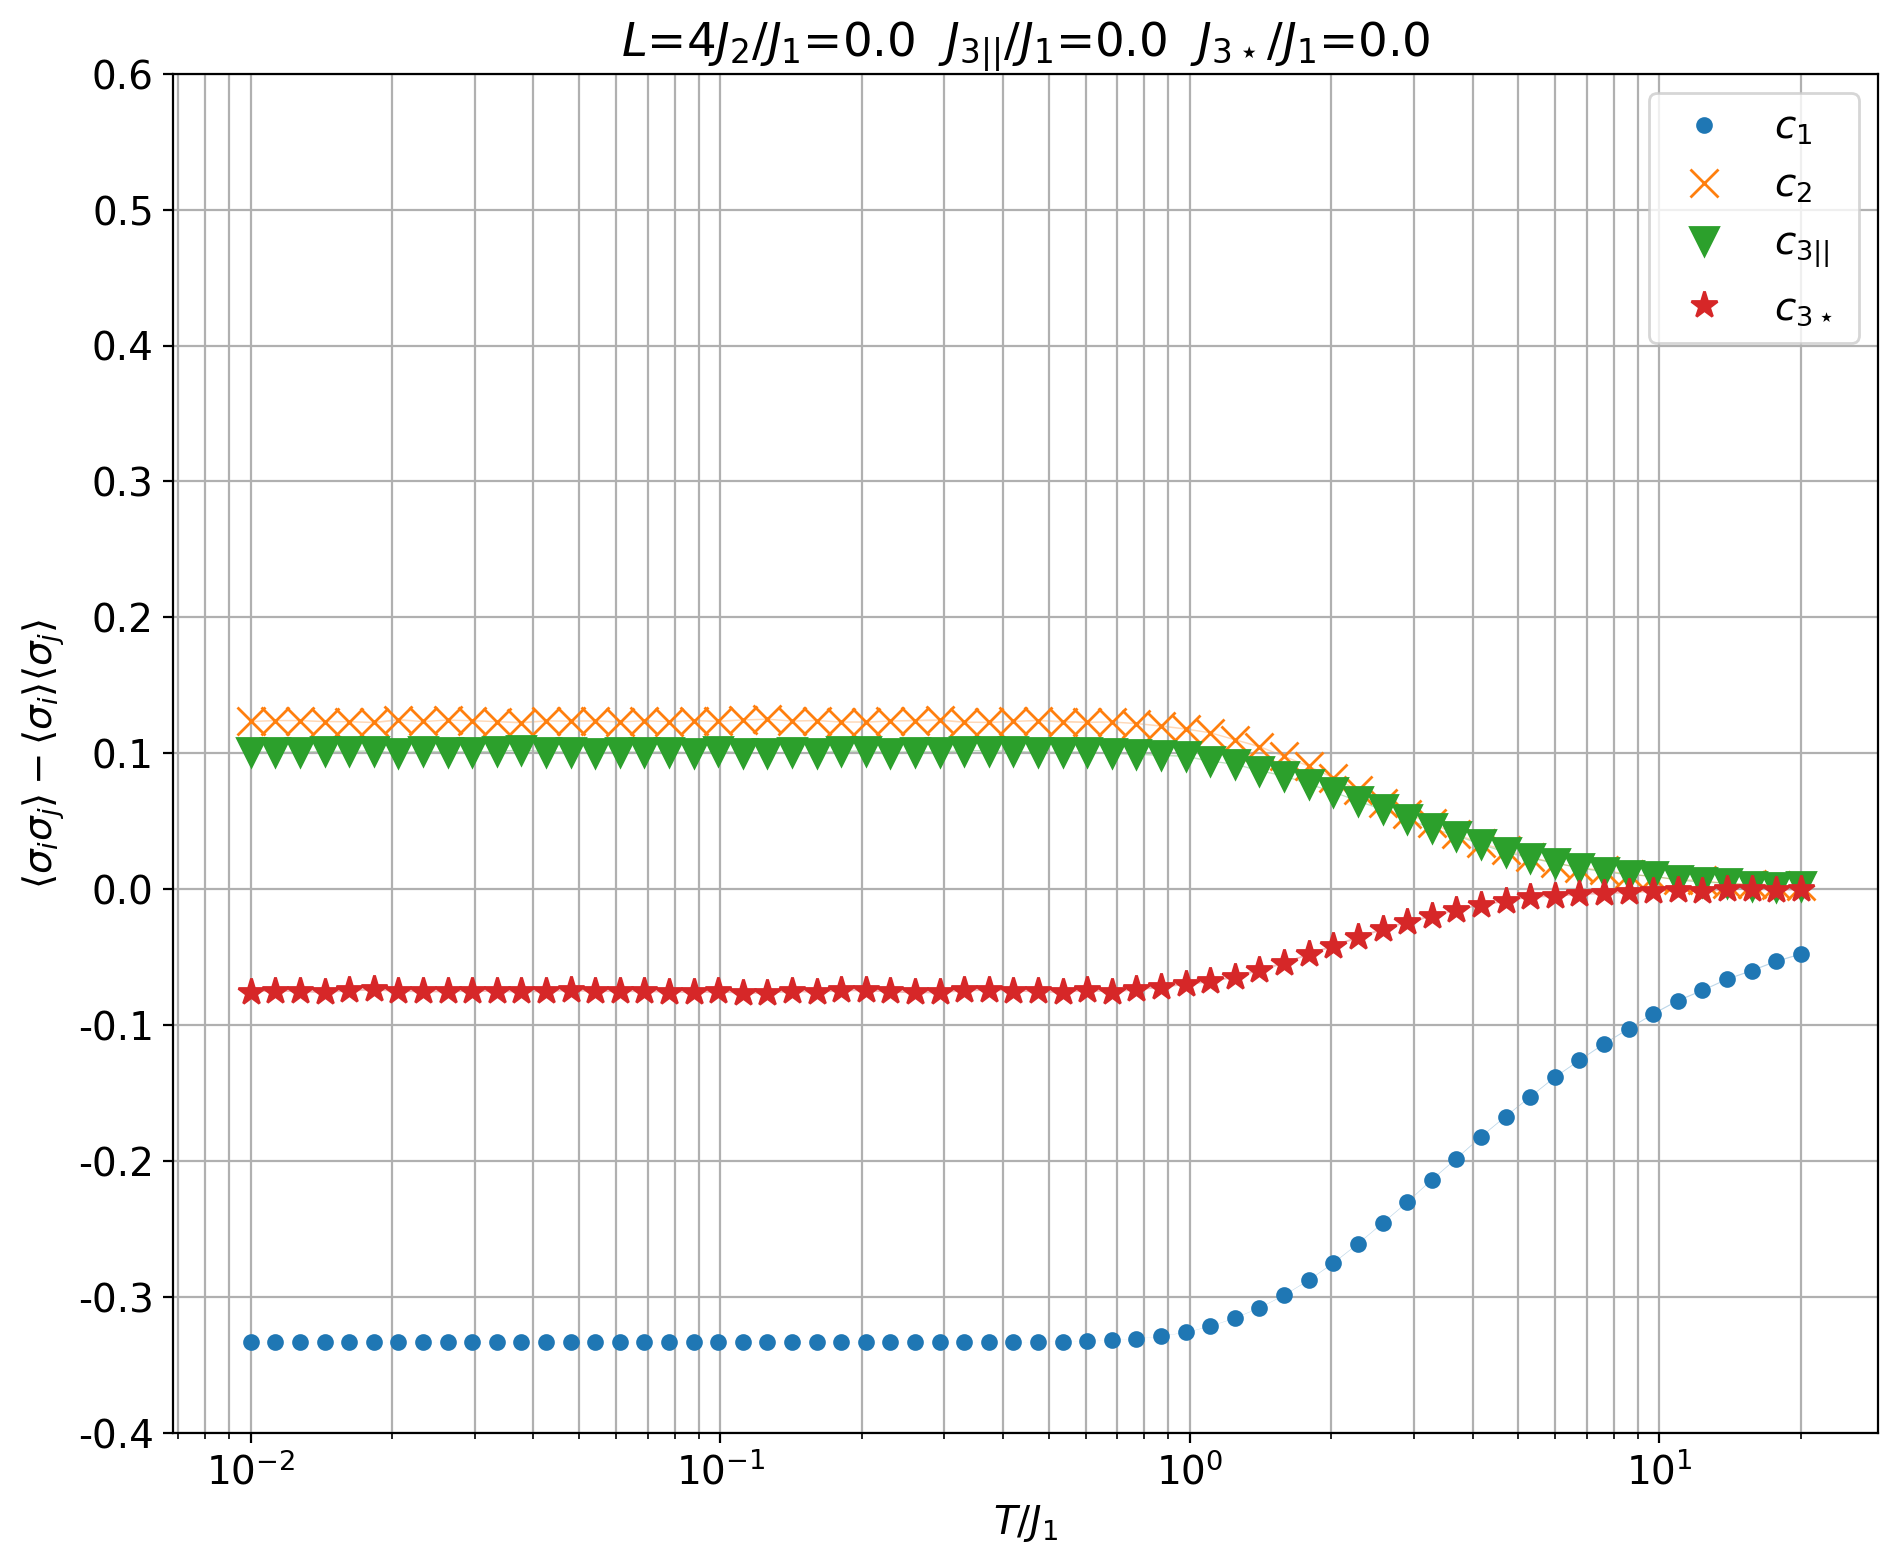

In [20]:
for i in range(n):
    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
    
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle)

False


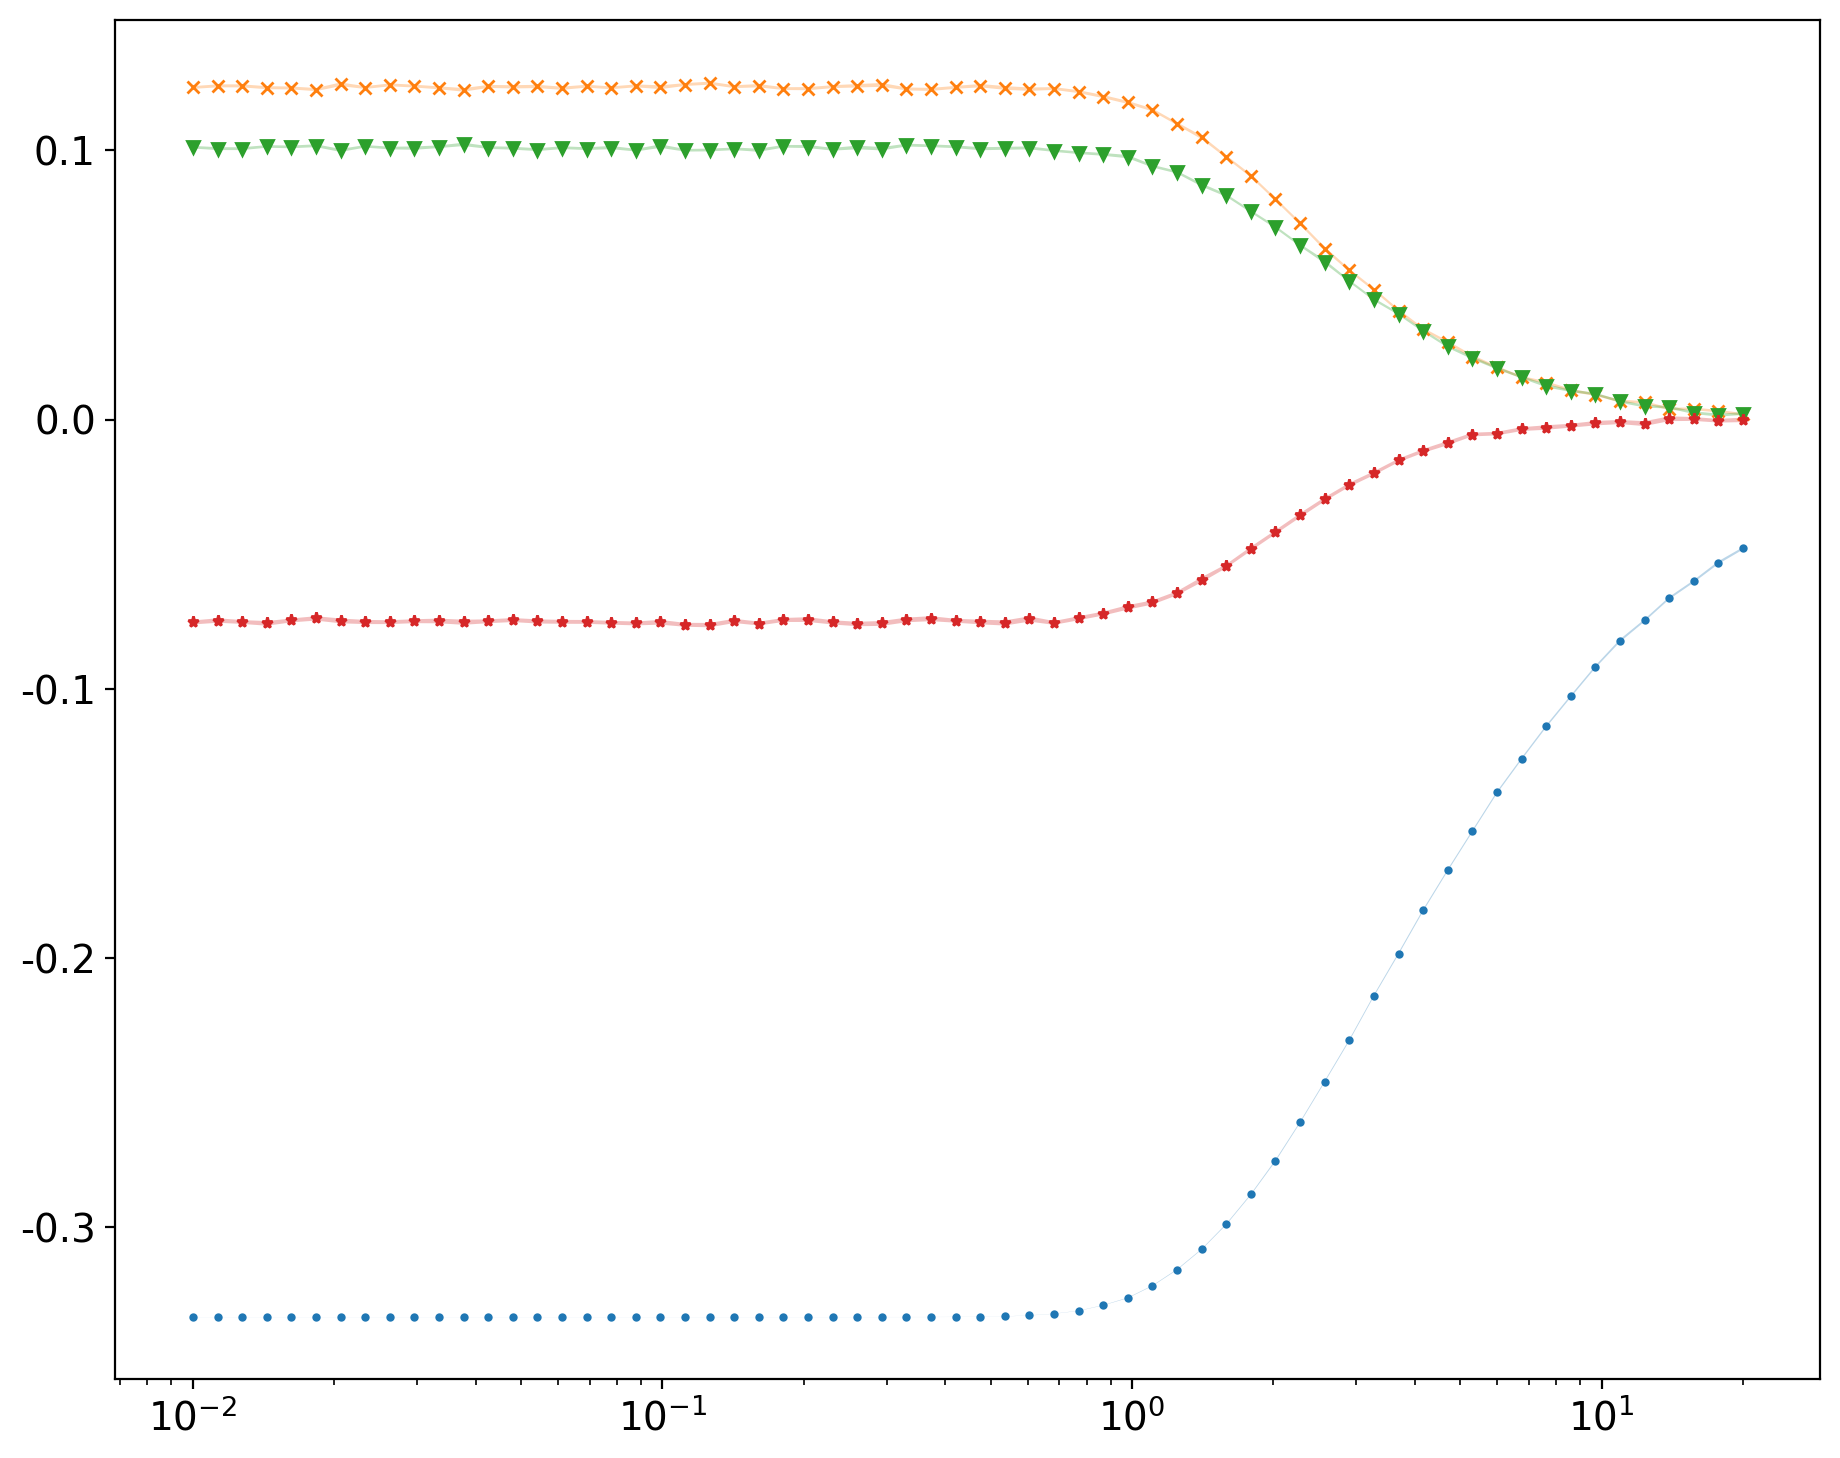

In [21]:
fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
markersize = 4
af.BasicPlotsFirstCorrelations(L, 0, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax, markersize = markersize)

In [22]:
# Introducing the experimental values for the plots below:
## <sisj>-<si><sj>:
NN1exp = -0.218;
NN1experr = 0.005;
NN1expdev = 0.02;

NN2exp = 0.021;
NN2experr = 0.004;
NN2expdev = 0.02;

NN3pexp = 0.063;
NN3pexperr = 0.005;
NN3pexpdev = 0.02;

NN3sexp = -0.003;
NN3sexperr = 0.005;
NN3sexpdev = 0.02
mexp = -0.193;

rmexpmag = True

if not rmexpmag:
    NN1exp += mexp**2;
    NN2exp += mexp**2;
    NN3pexp += mexp**2;
    NN3sexp += mexp**2;
    

print(NN1exp)
print(NN2exp)
print(NN3pexp)
print(NN3sexp)

-0.218
0.021
0.063
-0.003


In [23]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

True


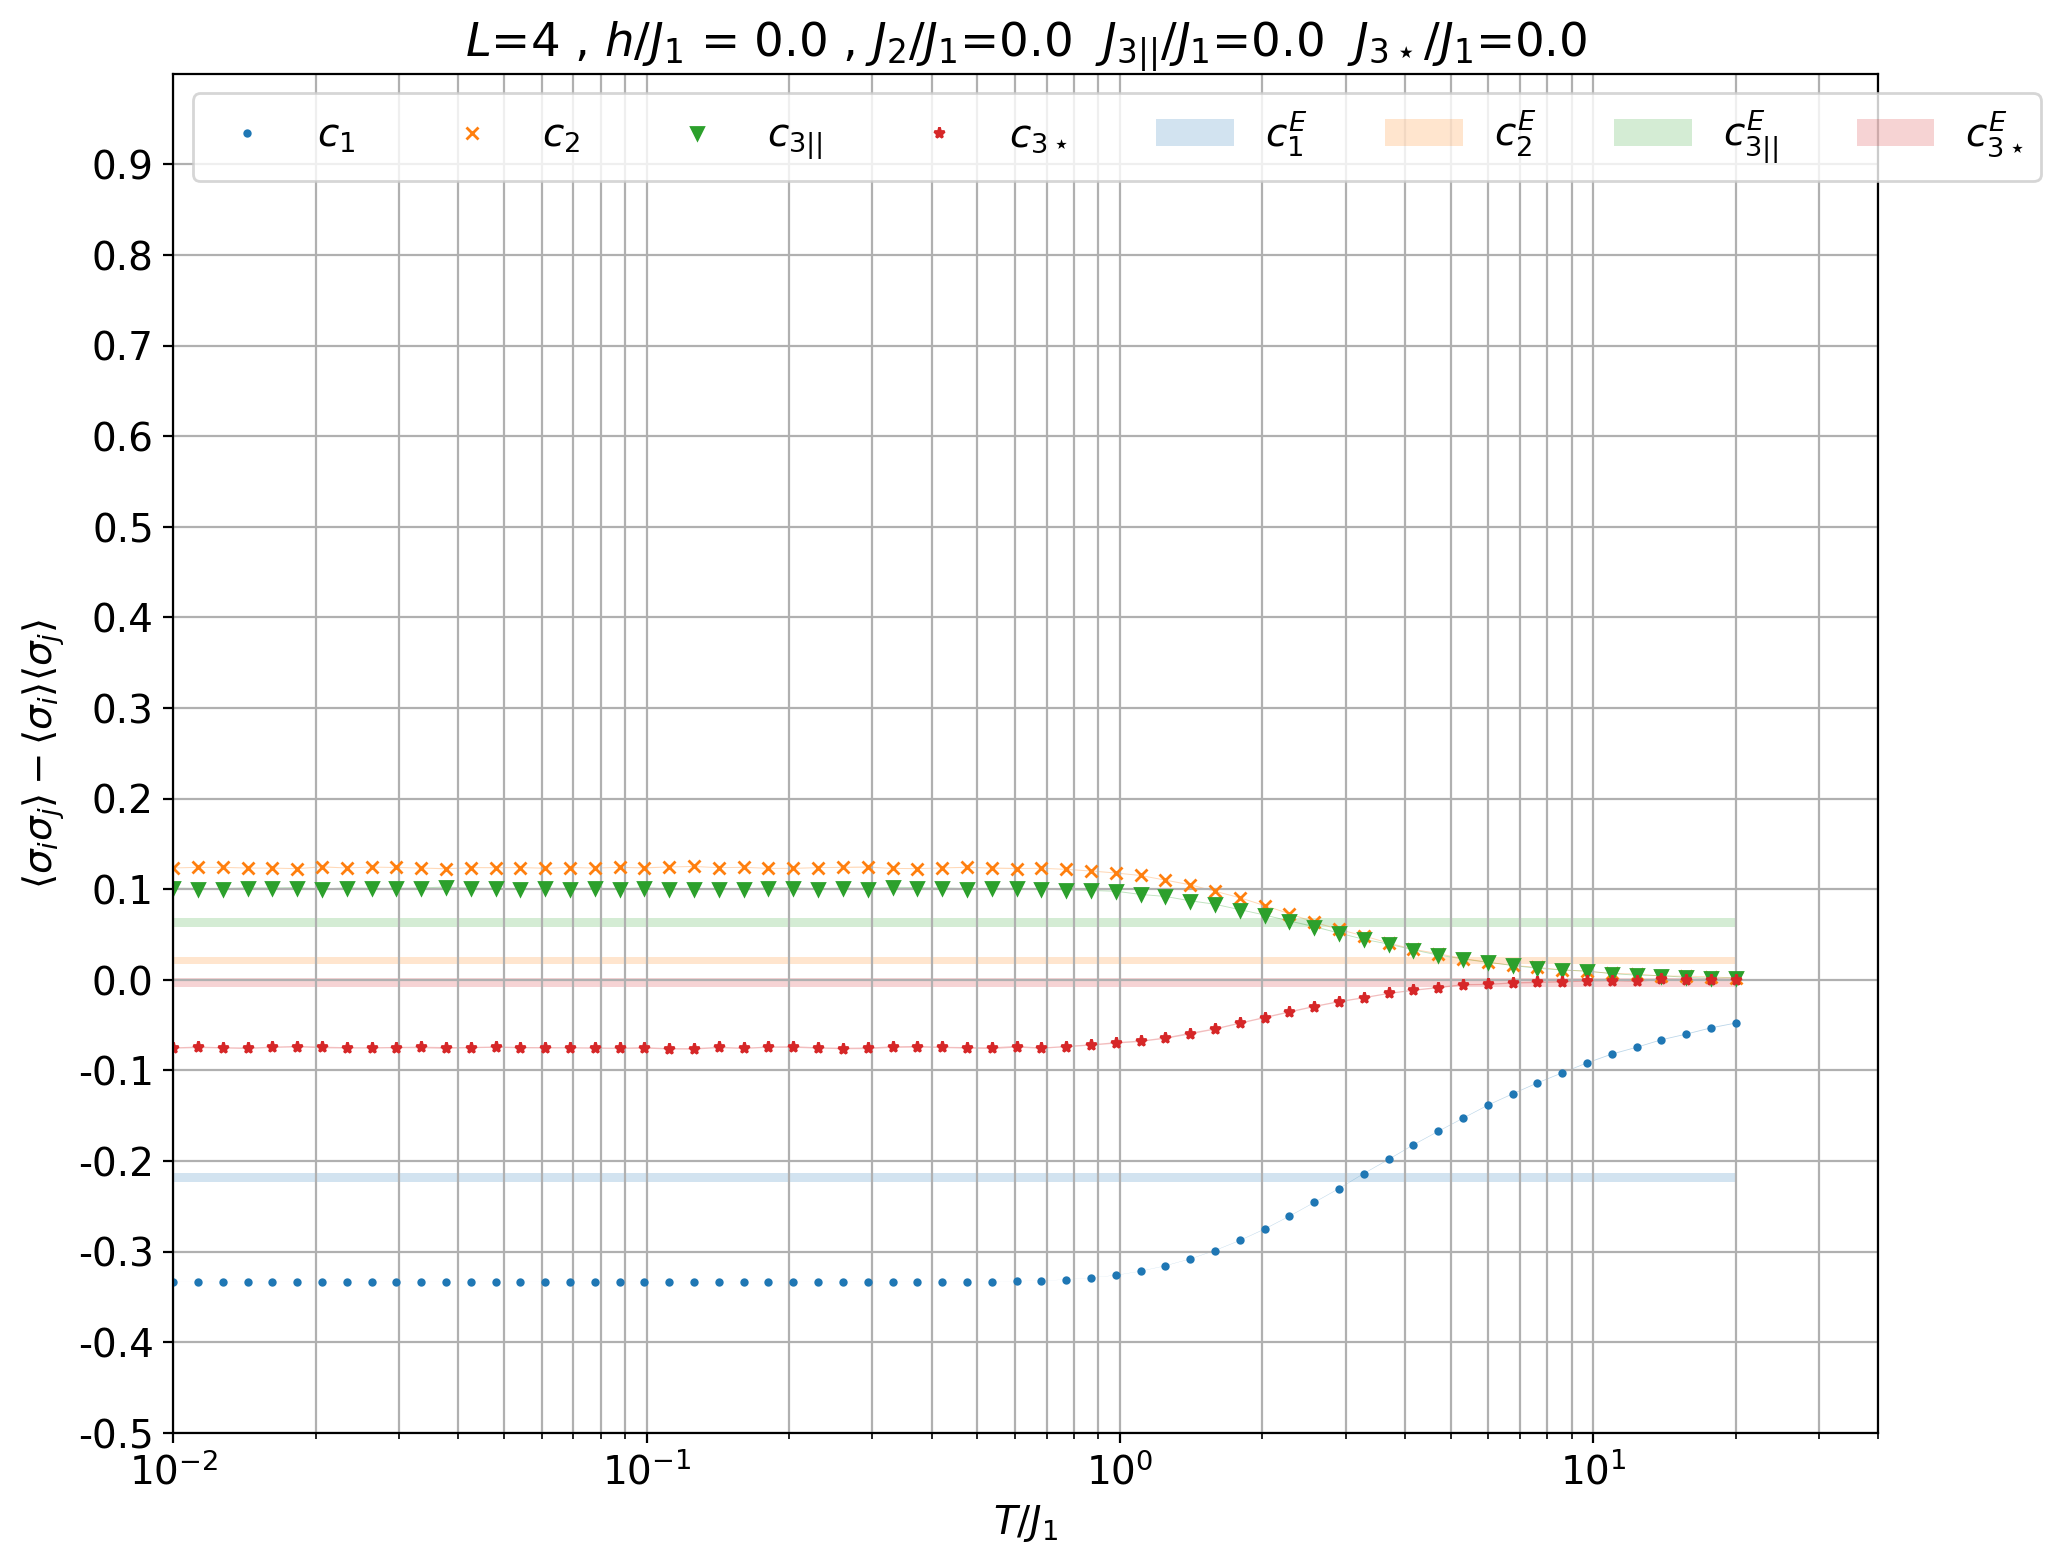

In [24]:
for i in range(n):
    for hid,h in enumerate(hfields_plots[0]):
        addsave = "L={0}".format(L[i]) + "h={0}".format(h)+"J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
        addtitle = r"$L$={0} ".format(L[i])+ r", $h/J_1$ = {0} ".format(h)+ r", $J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
        af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                       t_h_varMeanFc, foldername, 
                                       results_foldername, filenamelist,
                                       tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                       addtitle = addtitle,markersize=4,
                                       save = False, hid = hid)
        plt.gca().set_prop_cycle(None)
        Tmin = min(temperatures_plots[i])
        Tmax = max(temperatures_plots[i])
        plt.fill_between([Tmin,Tmax],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = r'$c_1^{E}$')
        plt.fill_between([Tmin,Tmax],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2,  label = r'$c_2^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2,  label = r'$c_{3||}^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2,label = r'$c_{3\star}^{E}$')
        plt.xlim([temperatures_plots[0][0], 40])
        plt.ylim([-0.5, 1])
        plt.yticks(np.arange(-0.5,1,0.1))
        plt.legend(loc = 'upper left', ncol = 8)
        plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

True


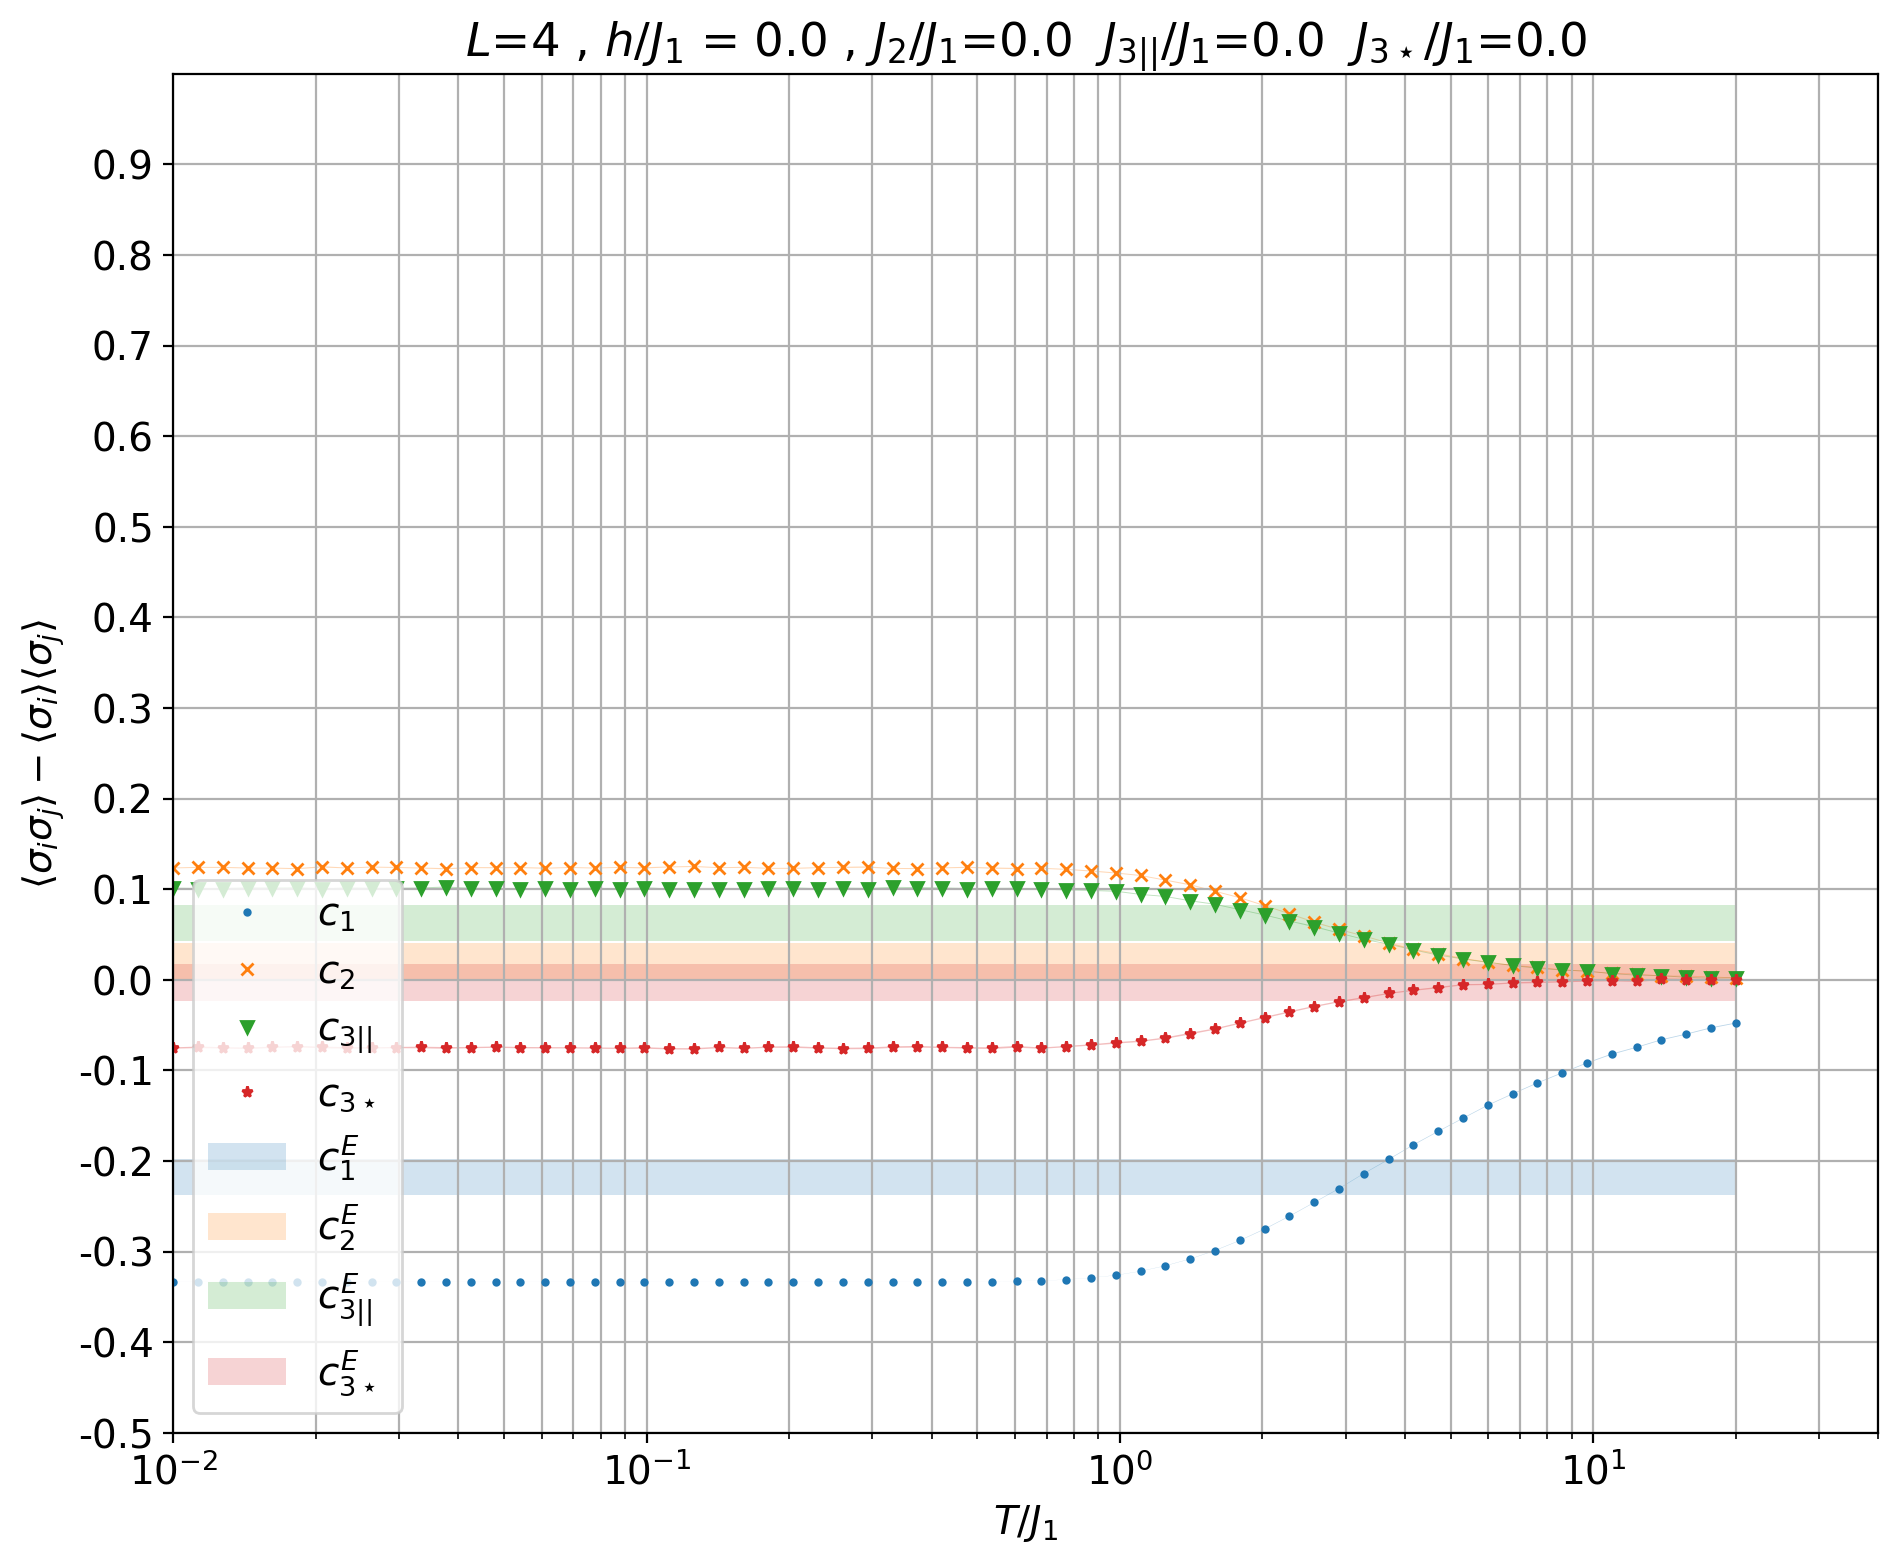

In [25]:
for i in range(n):
    for hid,h in enumerate(hfields_plots[0]):
        addsave = "L={0}".format(L[i]) + "h={0}".format(h)+"J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
        addtitle = r"$L$={0} ".format(L[i])+ r", $h/J_1$ = {0} ".format(h)+ r", $J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
        af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                       t_h_varMeanFc, foldername, 
                                       results_foldername, filenamelist,
                                       tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                       addtitle = addtitle,markersize=4,
                                       save = False, hid = hid)
        plt.gca().set_prop_cycle(None)
        Tmin = min(temperatures_plots[i])
        Tmax = max(temperatures_plots[i])
        plt.fill_between([Tmin,Tmax],[NN1exp-NN1expdev,NN1exp-NN1expdev],[NN1exp+NN1expdev, NN1exp+NN1expdev], alpha = 0.2, label = r'$c_1^{E}$')
        plt.fill_between([Tmin,Tmax],[NN2exp-NN2expdev,NN2exp-NN2expdev],[NN2exp+NN2expdev, NN2exp+NN2expdev], alpha = 0.2,  label = r'$c_2^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3pexp-NN3pexpdev,NN3pexp-NN3pexpdev],[NN3pexp+NN3pexpdev, NN3pexp+NN3pexpdev], alpha = 0.2,  label = r'$c_{3||}^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3sexp-NN3sexpdev, NN3sexp-NN3sexpdev],[NN3sexp+NN3sexpdev, NN3sexp+NN3sexpdev], alpha = 0.2,label = r'$c_{3\star}^{E}$')
        plt.xlim([temperatures_plots[0][0], 40])
        plt.ylim([-0.5, 1])
        plt.yticks(np.arange(-0.5,1,0.1))
        plt.legend(loc = 'lower left')
        plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

True


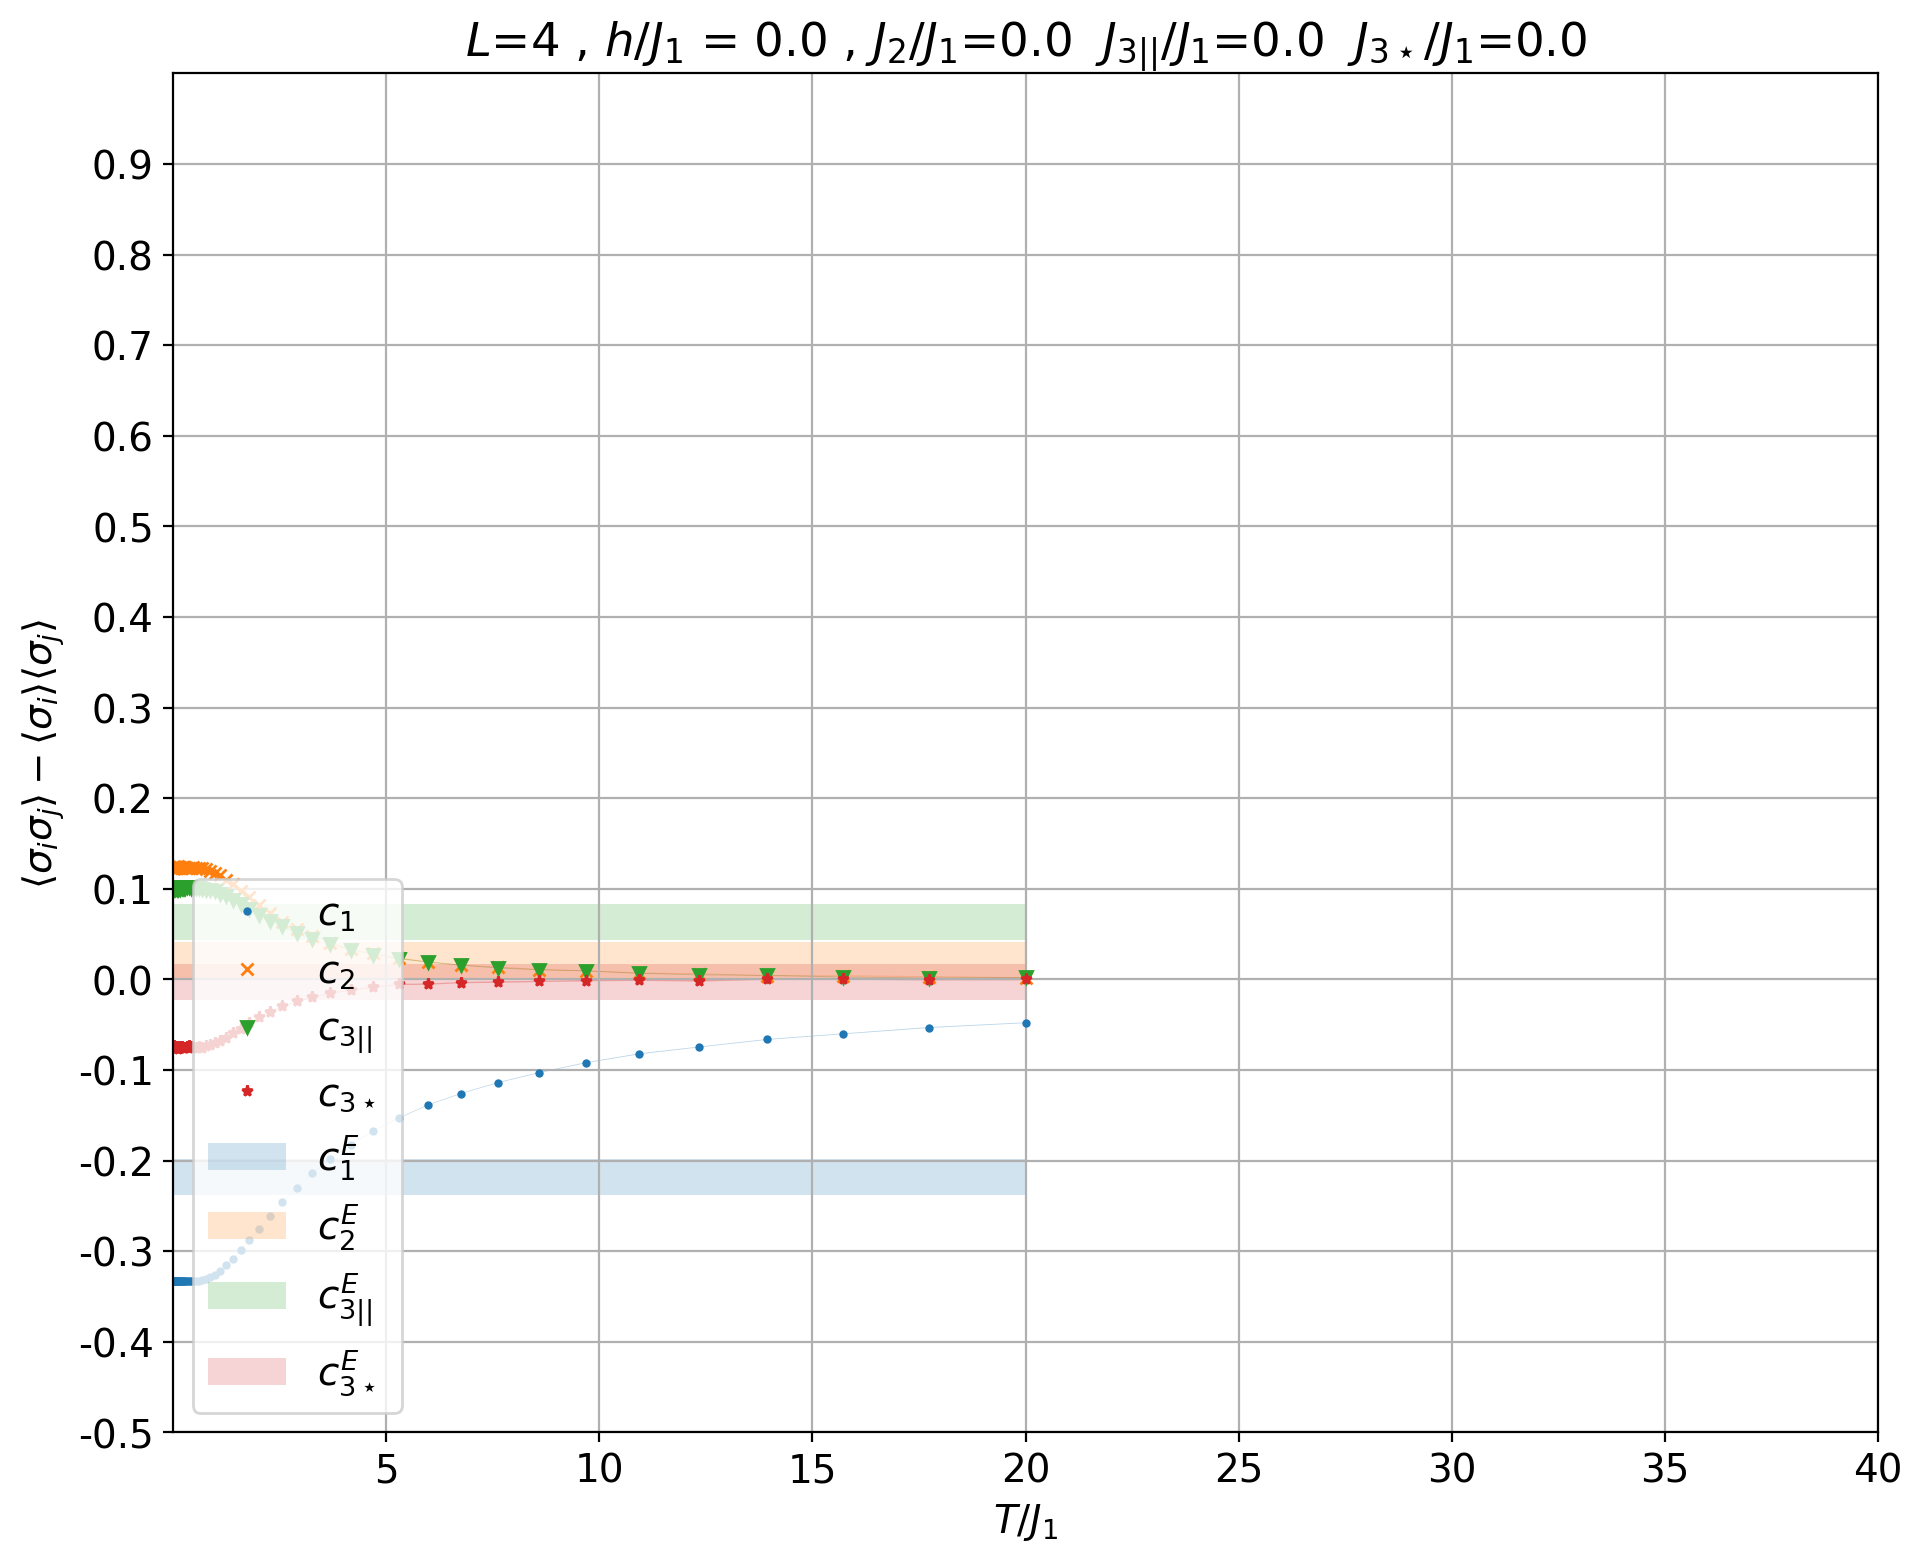

In [26]:
for i in range(n):
    for hid,h in enumerate(hfields_plots[0]):
        addsave = "L={0}".format(L[i]) + "h={0}".format(h)+"J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
        addtitle = r"$L$={0} ".format(L[i])+ r", $h/J_1$ = {0} ".format(h)+ r", $J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
        af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                       t_h_varMeanFc, foldername, 
                                       results_foldername, filenamelist,
                                       tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                       addtitle = addtitle,markersize=4,
                                       save = False, hid = hid, log = False)
        plt.gca().set_prop_cycle(None)
        Tmin = min(temperatures_plots[i])
        Tmax = max(temperatures_plots[i])
        plt.fill_between([Tmin,Tmax],[NN1exp-NN1expdev,NN1exp-NN1expdev],[NN1exp+NN1expdev, NN1exp+NN1expdev], alpha = 0.2, label = r'$c_1^{E}$')
        plt.fill_between([Tmin,Tmax],[NN2exp-NN2expdev,NN2exp-NN2expdev],[NN2exp+NN2expdev, NN2exp+NN2expdev], alpha = 0.2,  label = r'$c_2^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3pexp-NN3pexpdev,NN3pexp-NN3pexpdev],[NN3pexp+NN3pexpdev, NN3pexp+NN3pexpdev], alpha = 0.2,  label = r'$c_{3||}^{E}$')
        plt.fill_between([Tmin,Tmax],[NN3sexp-NN3sexpdev, NN3sexp-NN3sexpdev],[NN3sexp+NN3sexpdev, NN3sexp+NN3sexpdev], alpha = 0.2,label = r'$c_{3\star}^{E}$')
        plt.xlim([temperatures_plots[0][0], 40])
        plt.ylim([-0.5, 1])
        plt.yticks(np.arange(-0.5,1,0.1))
        plt.legend(loc = 'lower left')
        plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

In [27]:
np.savetxt('Temperatures.txt', temperatures_plots[0])
np.savetxt('Correlations.txt', t_h_MeanFc[0][:,0,:])

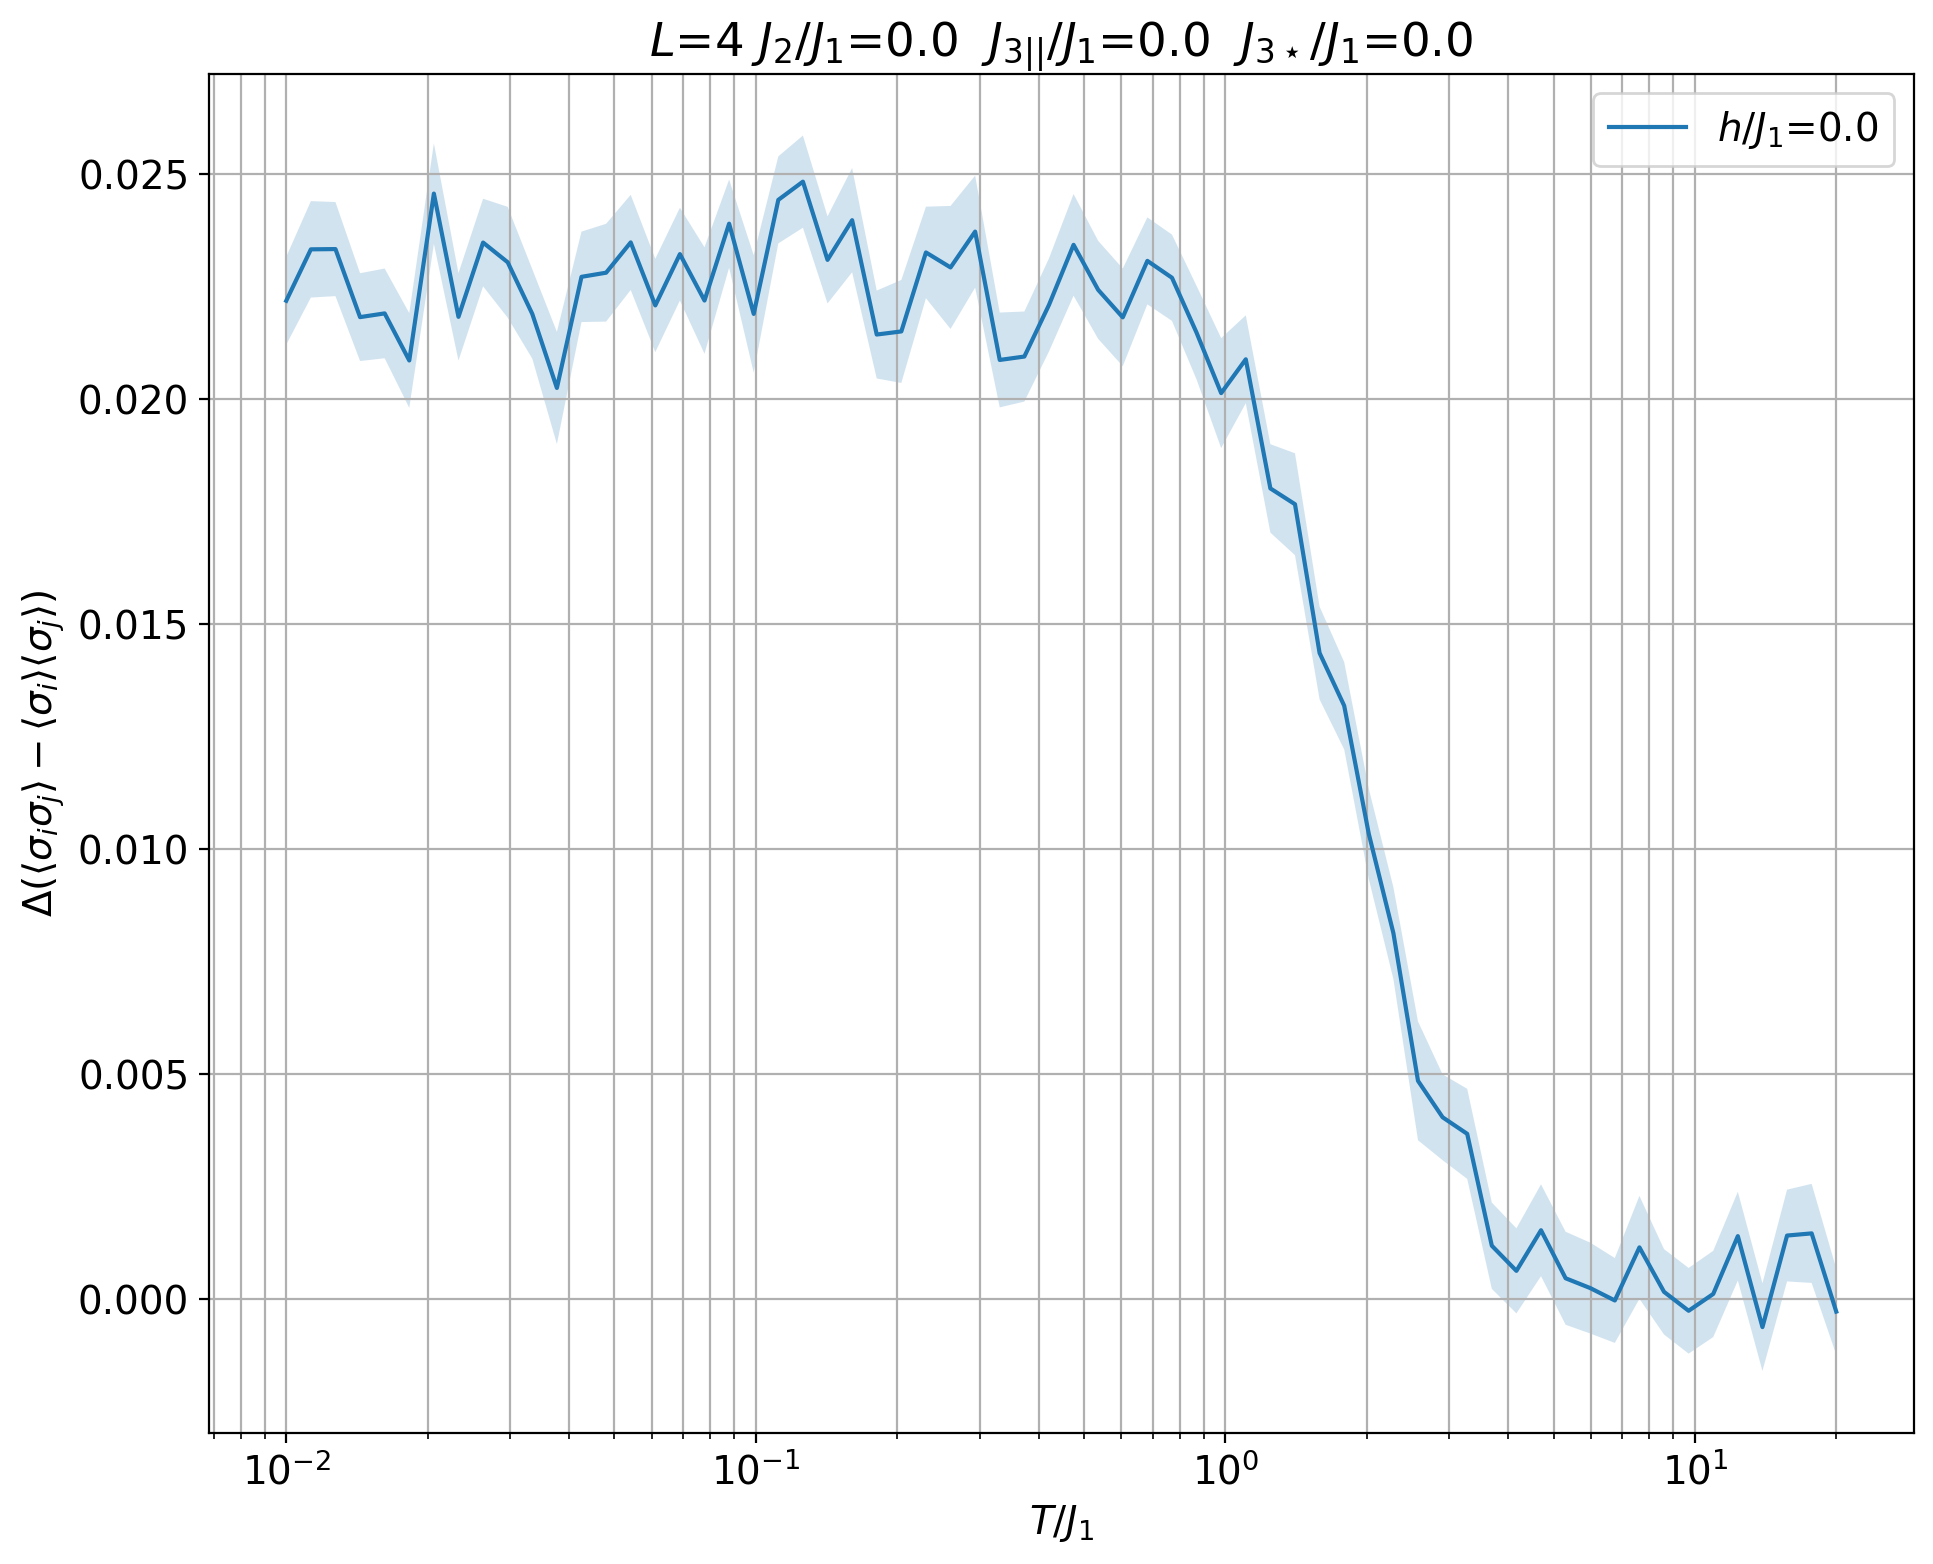

In [28]:
for i in range(n):
    addsave = "L={0}".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0} ".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
    
    figsize=(11,9)
    dpi = 200
    tmin = 0
    tmax = 192
    plt.figure(figsize=figsize, dpi = dpi)
    for hid,h in enumerate(hfields_plots[0]):
        plt.semilogx(temperatures_plots[i][tmin:tmax],t_h_MeanFc[i][tmin:tmax,hid,1]-t_h_MeanFc[i][tmin:tmax,hid,2],label = r'$h/J_1$={0}'.format(h))
        plt.fill_between(temperatures_plots[i][tmin:tmax],
                        t_h_MeanFc[i][tmin:tmax,hid,1]-t_h_MeanFc[i][tmin:tmax,hid,2]-2*np.sqrt(t_h_varMeanFc[i][tmin:,hid,2]),
                        t_h_MeanFc[i][tmin:tmax,hid,1]-t_h_MeanFc[i][tmin:tmax,hid,2]+2*np.sqrt(t_h_varMeanFc[i][tmin:,hid,2]), alpha = 0.2)
    plt.title(addtitle)
    plt.xlabel(r"$T/J_1$")
    plt.ylabel(r"$\Delta(\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle)$")
    plt.grid(which='both')
    plt.legend()

In [29]:
 t_h_MeanFrustratedTriangles,t_h_varMeanFrustratedTriangles = \
    af.LoadFrustratedTriangles(foldername, filenamelist,listfunctions,
                               stat_temps, stat_hfields, nb, **kw)

Binning...FrustratedTriangles
 bins list for binning:  [4096, 2048, 1024, 512, 256, 128, 64, 32, 16]
(4096, 64, 1)
(4096, 64, 1)
(2048, 64, 1)
(1024, 64, 1)
(512, 64, 1)
(256, 64, 1)
(128, 64, 1)
(64, 64, 1)
(32, 64, 1)
(16, 64, 1)


In [30]:
np.linspace(0,4.2,22)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2])

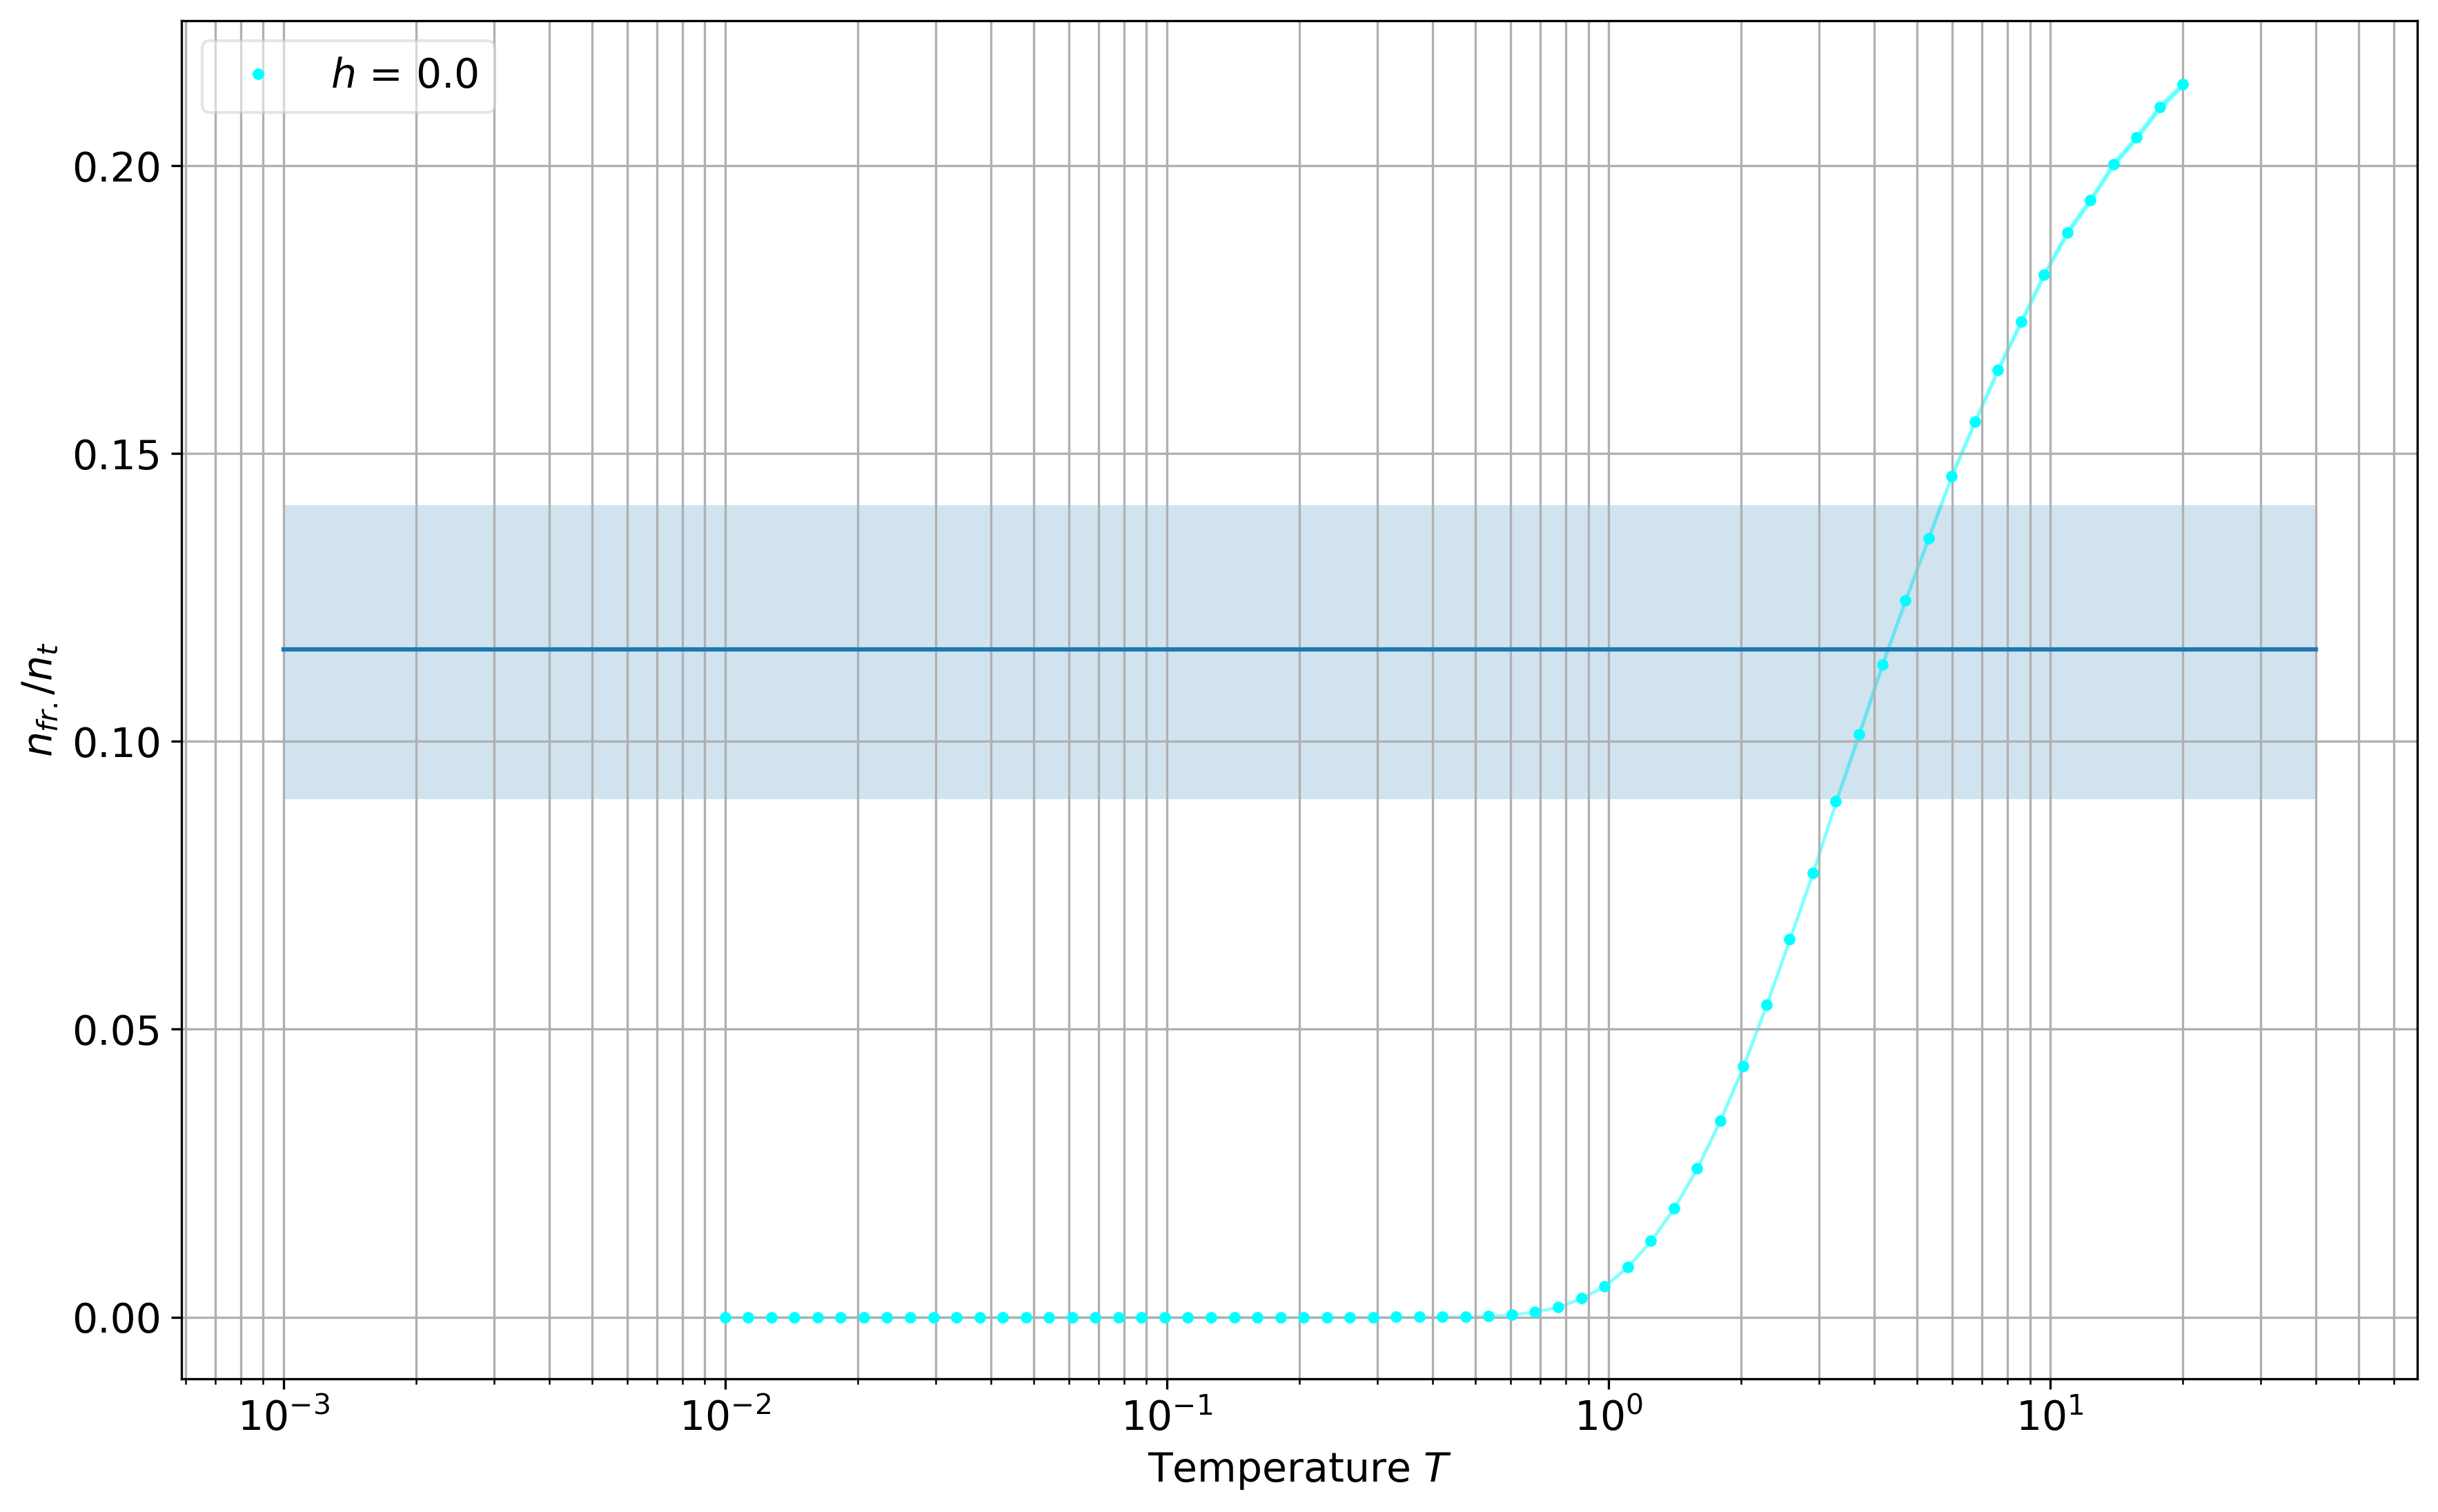

In [31]:
af.BasicPlotsTriangles(L, n, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                results_foldername, filenamelist, t_h_MeanFrustratedTriangles,
                        t_h_varMeanFrustratedTriangles, **kw)
plt.plot([1e-3, 40],[0.116, 0.116])
plt.fill_between([1e-3,40],[0.09,0.09],[0.141,0.141],alpha = 0.2)

In [32]:
import importlib
importlib.reload(af)
import DualwormFunctions as dw

In [33]:
ids2walker = idswalker

In [34]:
# Plot the lowest temperature state to get an idea
t_spinstates, t_states, t_charges = af.LoadStates(foldername, filenamelist, L, nh)
latsize = t_spinstates[0][0].size
[d_ijl, ijl_d, s_ijl, ijl_s, d_2s, s2_d, d_nd, d_vd, d_wn,
     sidlist, didlist, c_ijl, ijl_c, c2s, csign] =\
    dw.latticeinit(L[0])
print(ids2walker[0][0,0])

34


In [35]:
Lp = L[0]
state = t_states[0][ids2walker[0][1,0]]
spinstate = t_spinstates[0][ids2walker[0][1,0]]
#chargestate = t_charges[0][ids2walker[0][0,0]]

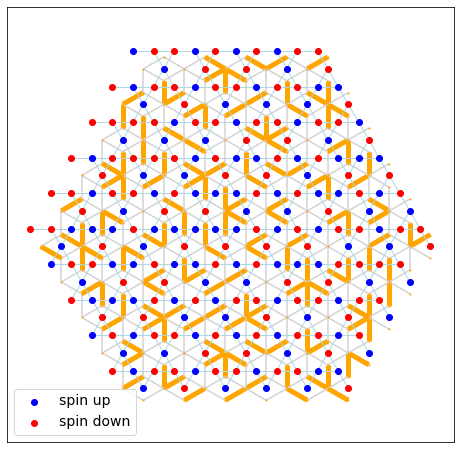

In [36]:
kdraw.plotstate(0, Lp, d_ijl, ijl_s, sidlist, didlist, s2_d, [state], [spinstate],
                dim_node_color = 'orange', dim_color ='orange', 
                spin_up_color = 'blue', spin_down_color = 'red')
#kdraw.plot_honeycomb_chargestate(chargestate, ijl_c,
#                                 L,2,c1_color = 'black', c2_color = 'green',
#                                 c3_color = 'red', c4_color = 'black', uponly=True)
plt.legend()